In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap
import tamil
from collections import defaultdict

In [2]:
plt.rcParams.update({'font.size': 22})
figdir = '/Users/navaneethan/Dropbox/Projects/knowyourward/figures/176_tamil/'

In [3]:
print ''.join([i for i in 'வார்டு எண் ward number' if ord(i) < 128]).strip()

s = [i for i in 'வார்டு எண்']
print s

ward number
['\xe0', '\xae', '\xb5', '\xe0', '\xae', '\xbe', '\xe0', '\xae', '\xb0', '\xe0', '\xaf', '\x8d', '\xe0', '\xae', '\x9f', '\xe0', '\xaf', '\x81', ' ', '\xe0', '\xae', '\x8e', '\xe0', '\xae', '\xa3', '\xe0', '\xaf', '\x8d']


In [4]:
def plot_column(data=None, col=None, ward=''):
    try:
        col_decode = ''.join([i for i in col if ord(i) < 128]).strip()
        data[col] = data[col].apply(lambda c: ''.join([i for i in c if ord(i) < 128]).strip())
        col2 = ' \n'.join(wrap(col_decode, 60))
        data['dummy'] = [1]*data.shape[0]
        with plt.style.context('bmh'):
            plt.figure(figsize=(20, 14))
            g = sns.barplot(x=col, y='dummy', data=data, estimator=lambda x: len(x)*100.0 / len(data))
            g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=16)
            plt.ylabel(col2 + '(%)', fontsize=22)
            plt.title('Ward '+ward, fontsize=22)
            plt.savefig(figdir+str(ward)+'_tamil_'+col+'.jpg')        
    except:
        print 'Could not generate figure for:', col.upper()
        pass

In [5]:
tamil_english_dict = {
    u'இல்லை': 'No',
    u'ஆம்': 'Yes',
    u'தெரியவில்லை': "Don't Know",
    u"ஆண்": "Male",
    u"பெண்": "Female"
}

def get_eng_val(x):
    return tamil_english_dict[x] if x in tamil_english_dict else x

In [6]:
def get_ward_data(survey=None, ward_number=None):
#     colname = tamil.tscii.convert_to_unicode()
    ward_survey = survey[survey['Ward Number'] == ward_number]
    ward_survey = ward_survey.applymap(lambda x: get_eng_val(x))
    return ward_survey

In [7]:
tamil_survey = pd.read_excel('../raw/SURVEY- KNOW OUR WARD (Responses)    November 19 2017_tamil_engcols.xlsx', )
# tamil_survey2 = tamil_survey['வார்டு எண்'].apply(lambda item: item.encode('raw-unicode-escape').decode('utf-8'))

In [8]:
ward_176 = get_ward_data(survey=tamil_survey, ward_number=176)

In [9]:
ward_176.shape

(87, 248)

Could not generate figure for: PLEASE RATE THESE STATEMENTS REGARDING POWER SUPPLY [AVAILABILITY OF UNINTERRUPTED POWER SUPPLY]
Could not generate figure for: PLEASE RATE THESE STATEMENTS REGARDING POWER SUPPLY [STABLE VOLTAGE WITHOUT FLUCTUATIONS ALWAYS]
Could not generate figure for: PLEASE RATE THESE STATEMENTS REGARDING POWER SUPPLY [THERE IS IMMEDIATE RESPONSE TO COMPLAINTS]
Could not generate figure for: PLEASE RATE THESE STATEMENTS REGARDING POWER SUPPLY [I AM ASKED FOR A BRIBE FOR RESOLVING COMPLAINTS]
Could not generate figure for: PLEASE RATE THESE STATEMENTS REGARDING POWER SUPPLY [ONLINE BILL PAYMENT IS EASY]
Could not generate figure for: PLEASE RATE THESE STATEMENTS REGARDING POWER SUPPLY [BILL PAYMENT PROCESS IS EASY AT THE EB OFFICE]
Could not generate figure for: PLEASE RATE THESE STATEMENTS REGARDING POWER SUPPLY [POWER CABLES ARE PROPERLY LAID AND SAFELY MAINTAINED]
Could not generate figure for: PLEASE RATE THESE STATEMENTS REGARDING POWER SUPPLY [JUNCTION BOXES ARE

/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Could not generate figure for: PLEASE RATE THESE STATEMENTS REGARDING TRAFFIC. [SIGNALS ARE AVAILABLE AT IMPORTANT JUNCTIONS]
Could not generate figure for: PLEASE RATE THESE STATEMENTS REGARDING TRAFFIC. [SIGNALS ARE IN GOOD WORKING CONDITION]
Could not generate figure for: PLEASE RATE THESE STATEMENTS REGARDING TRAFFIC. [ROAD SIGNS AND ZEBRA CROSSINGS ARE PROVIDED]
Could not generate figure for: PLEASE RATE THESE STATEMENTS REGARDING TRAFFIC. [SIGNALS ARE DISABILITY FRIENDLY]
Could not generate figure for: PLEASE RATE THESE STATEMENTS REGARDING TRAFFIC. [SPEED BREAKERS ARE AVAILABLE AT APPROPRIATE PLACES]
Could not generate figure for: PLEASE RATE THESE STATEMENTS REGARDING TRAFFIC. [SPEED BREAKER (HEIGHT AND WIDTH) ARE AS PER REGULATIONS]
Could not generate figure for: IS THERE A POLICE BOOTH IN YOUR AREA?
Could not generate figure for: PLEASE RATE THESE STATEMENTS REGARDING PUBLIC SAFETY. [THERE IS PERIODIC AND RESPONSIVE POLICE PATROLLING]
Could not generate figure for: PLEASE RAT

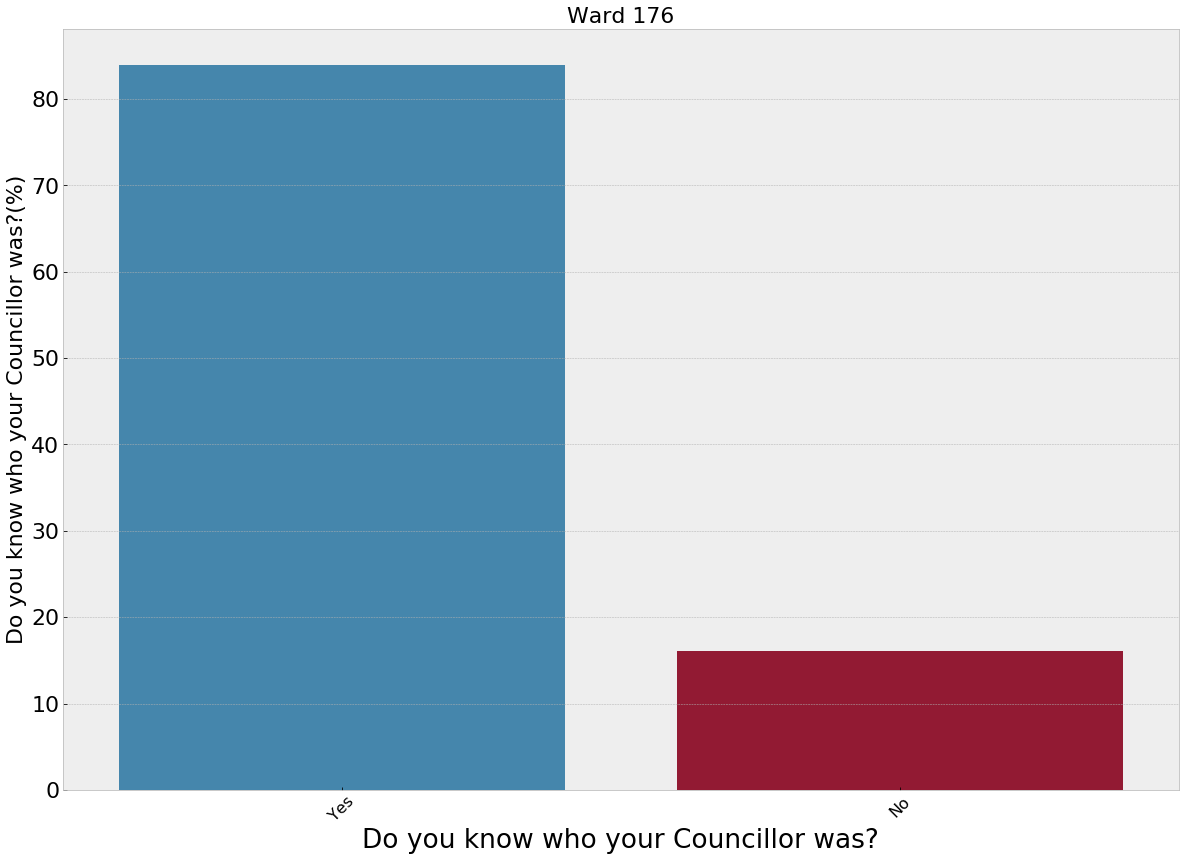

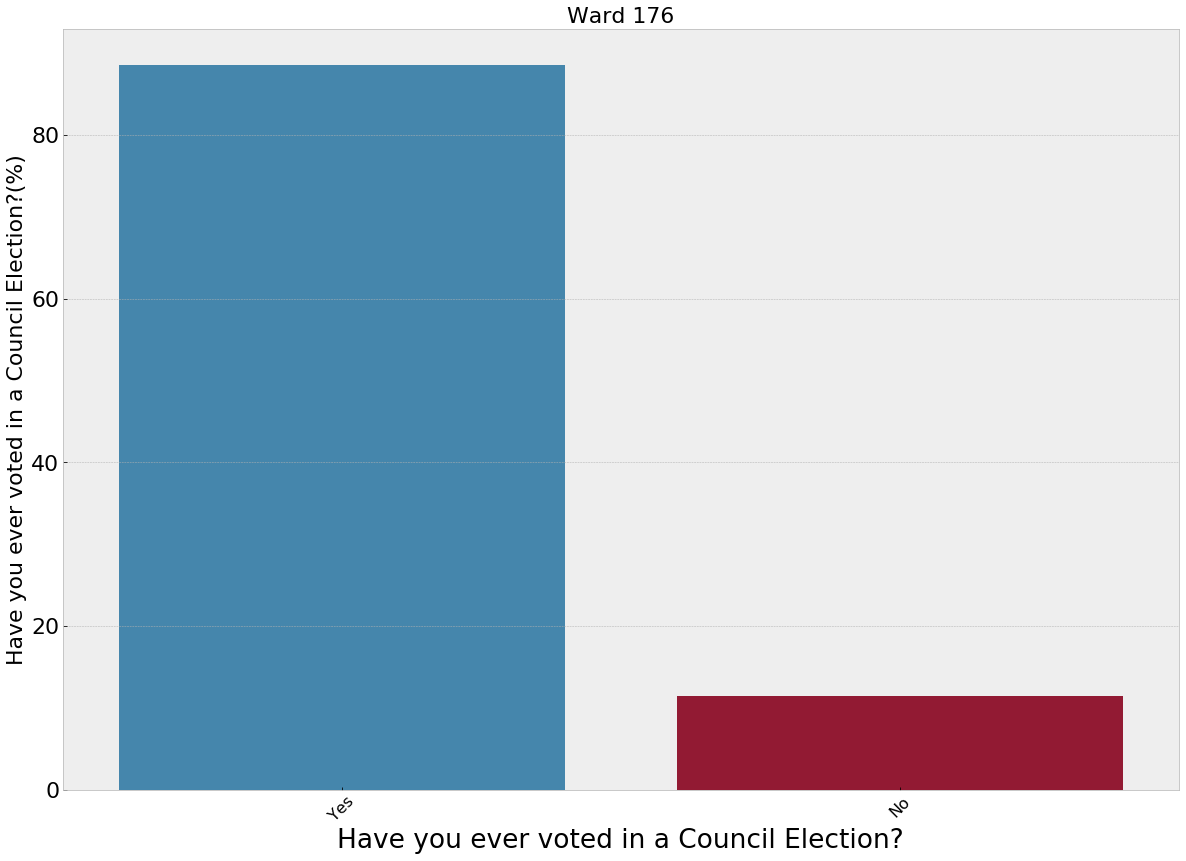

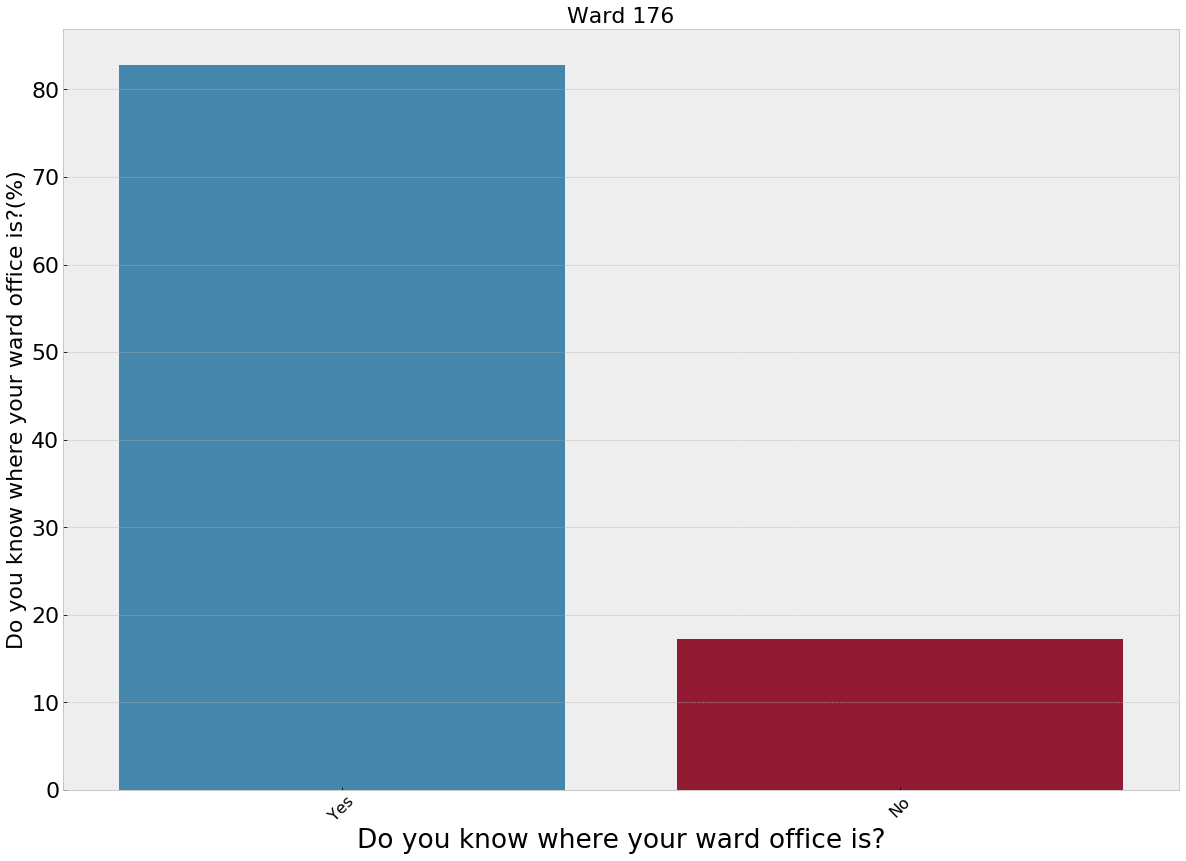

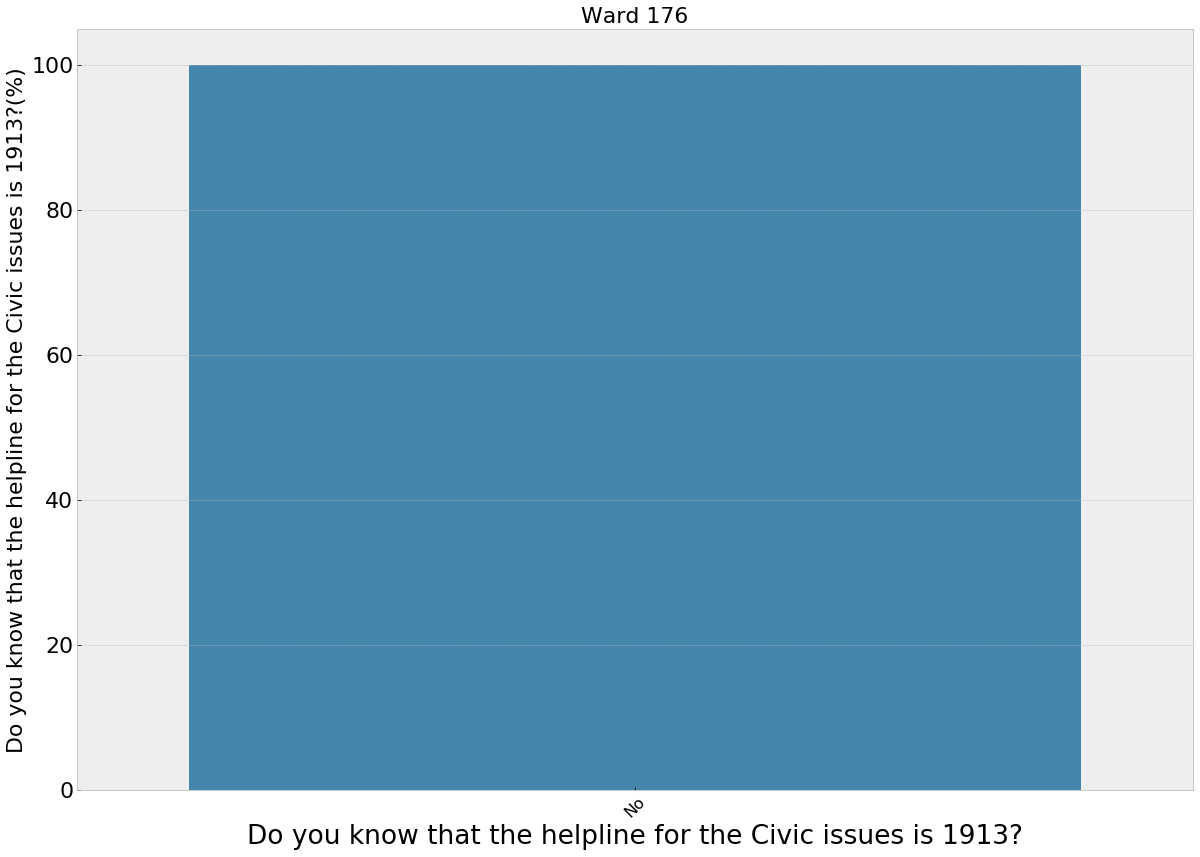

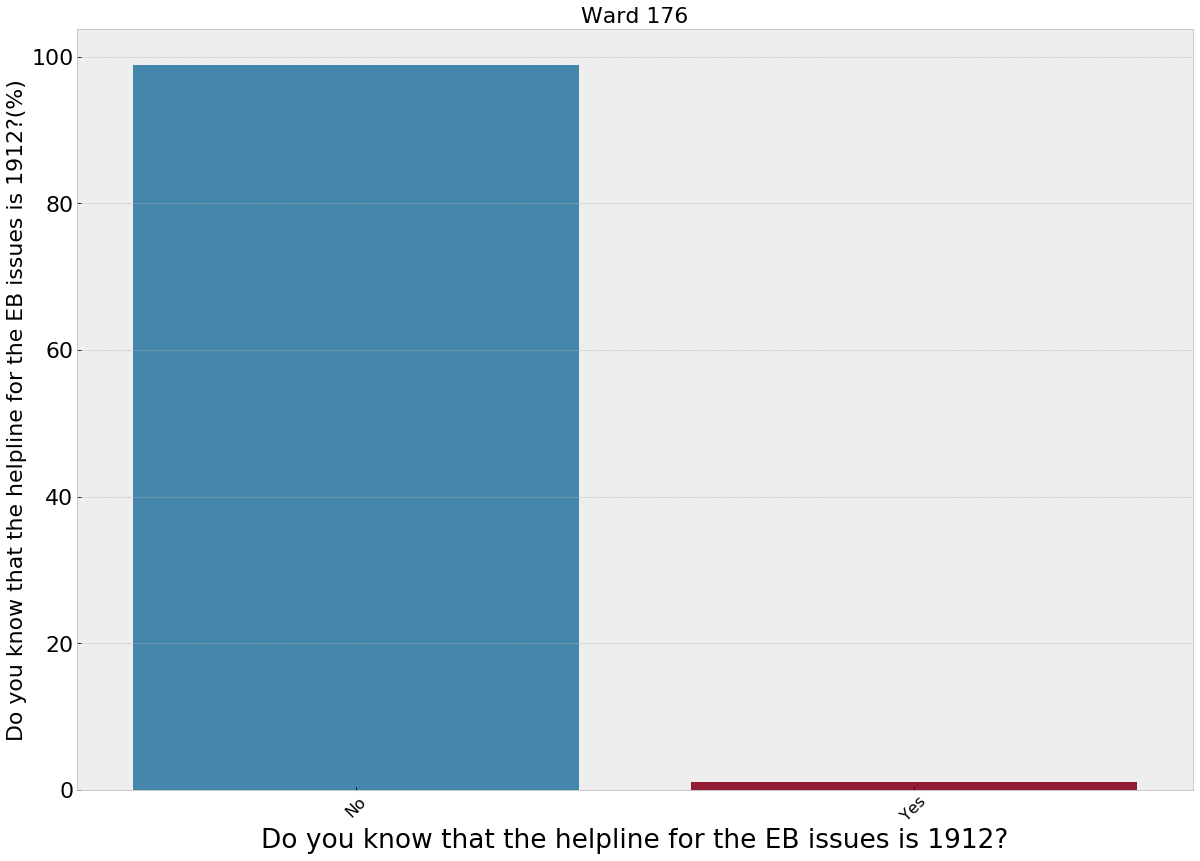

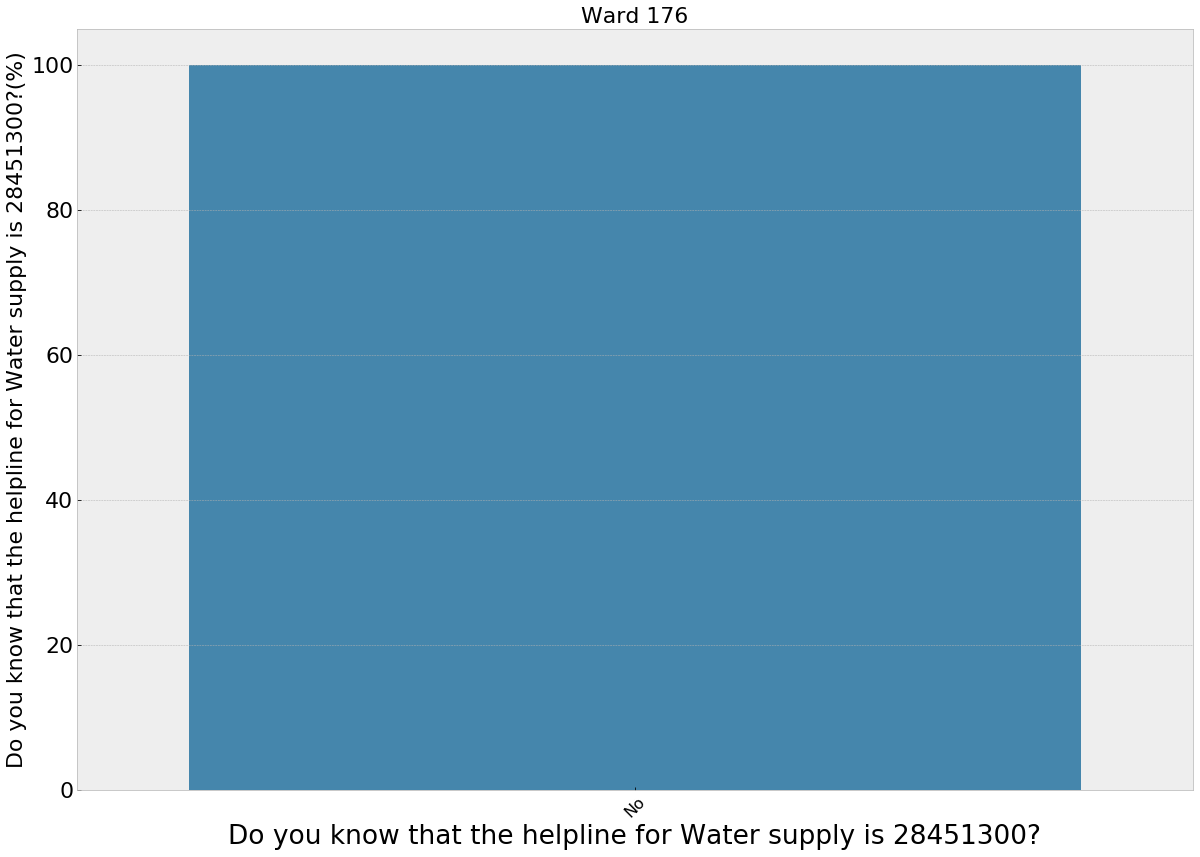

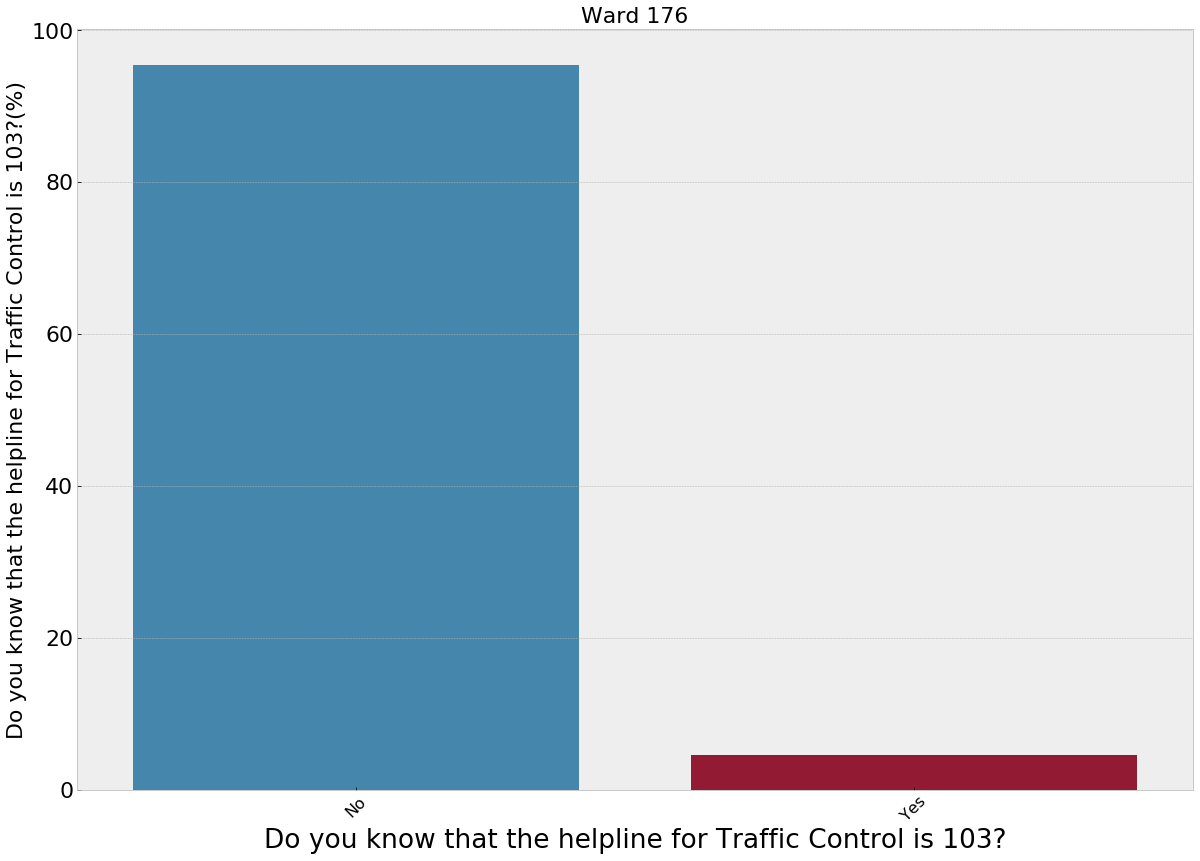

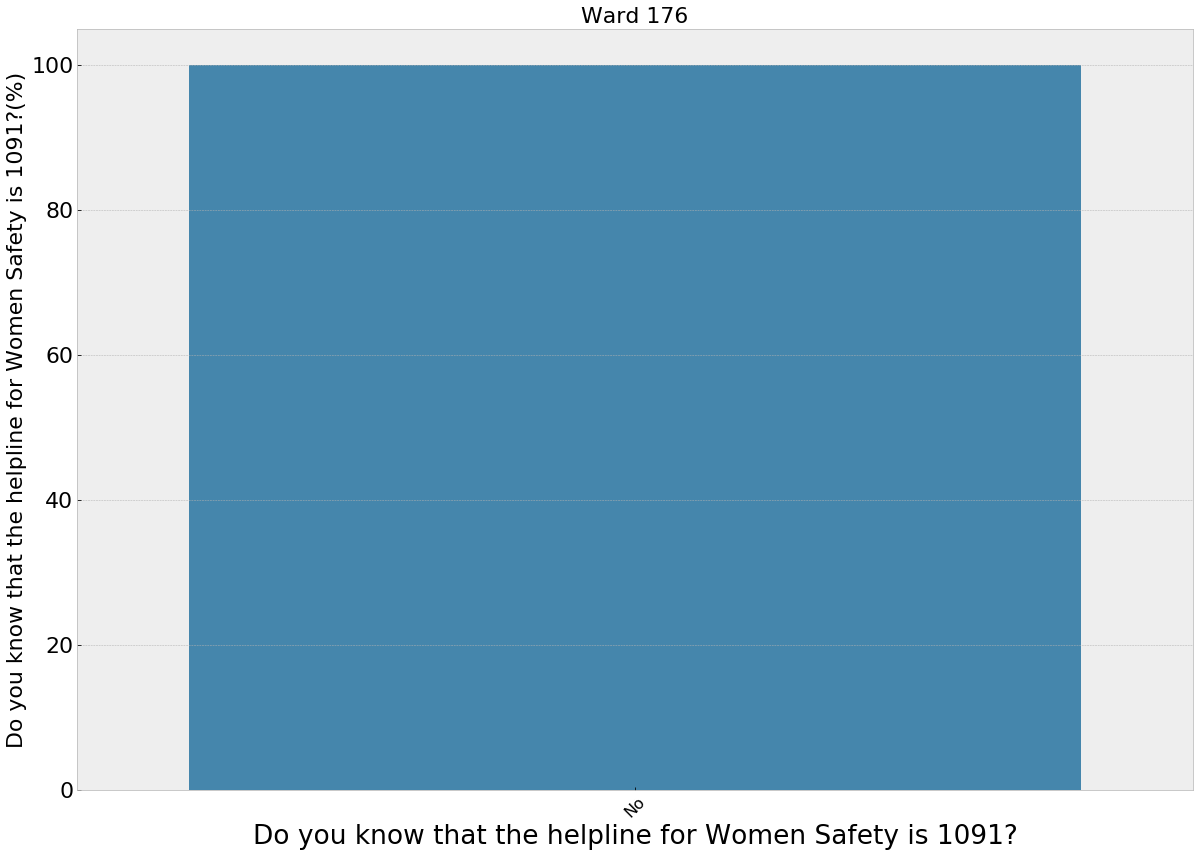

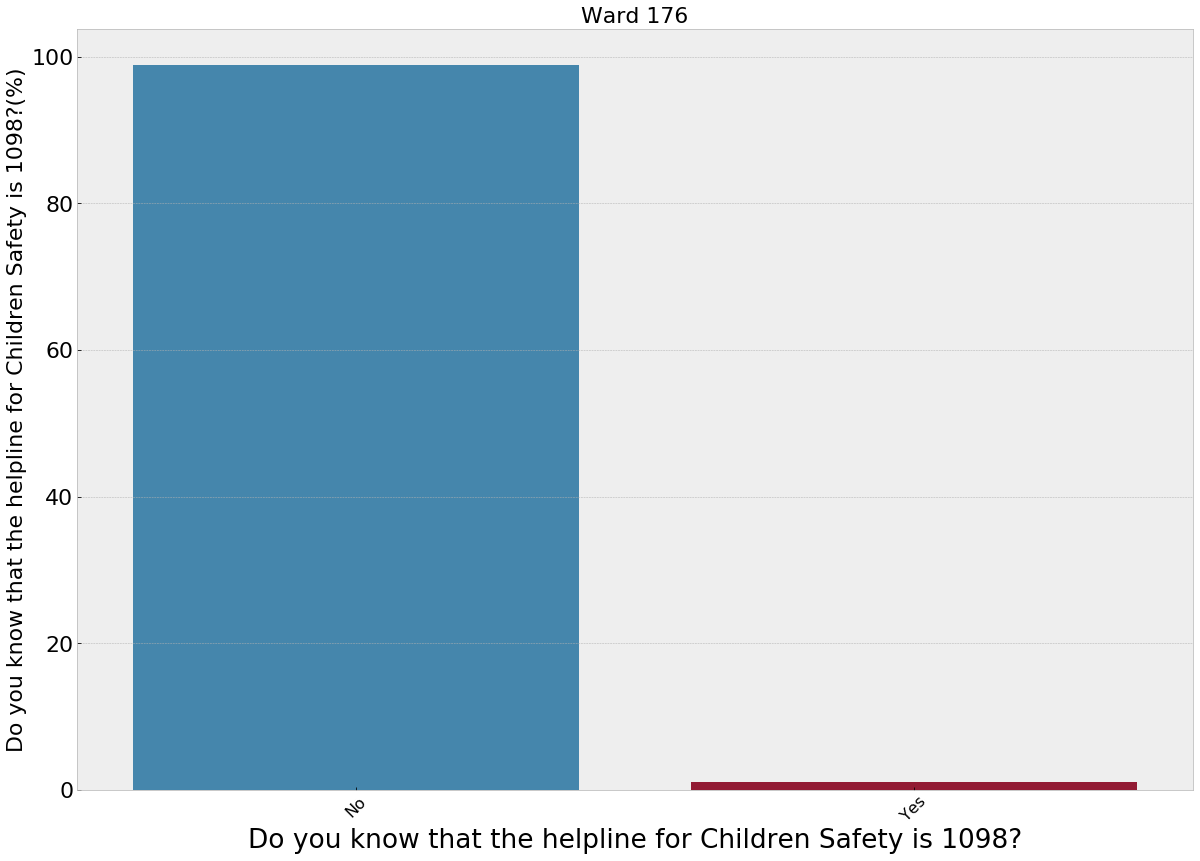

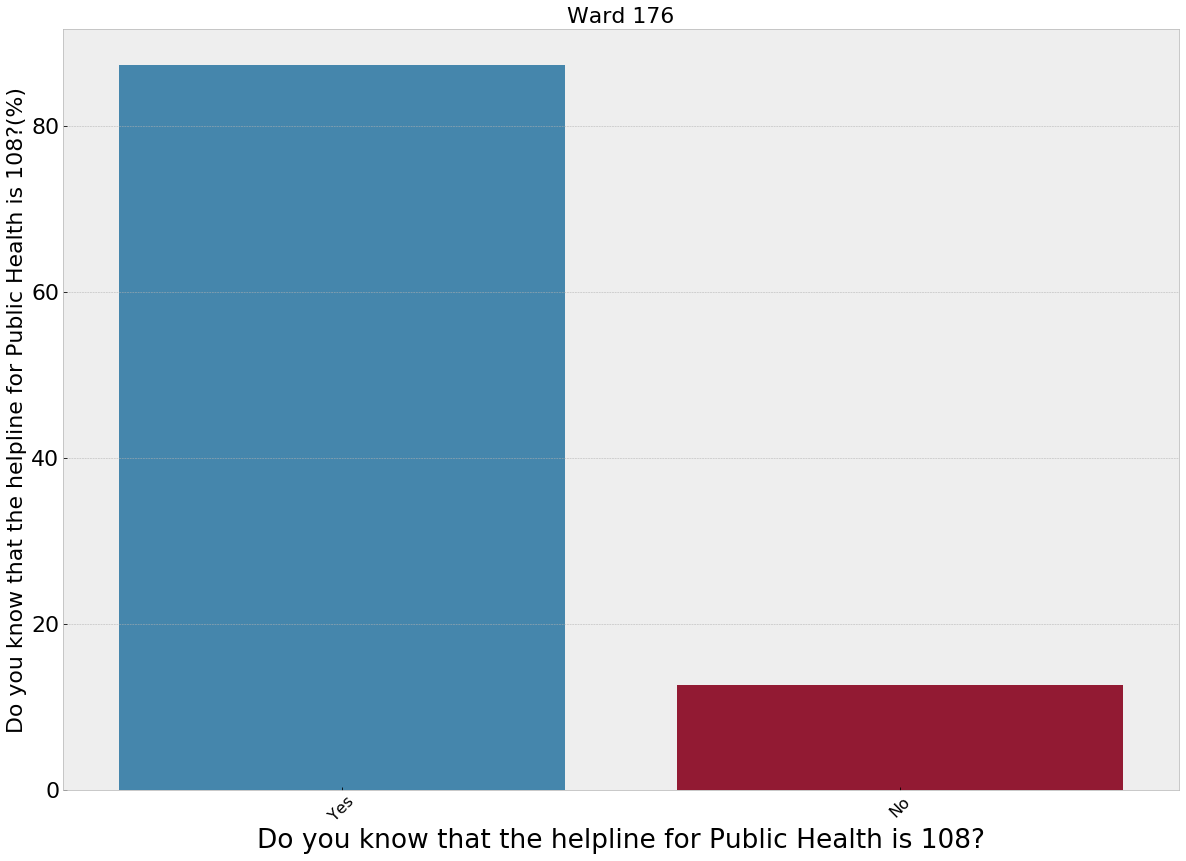

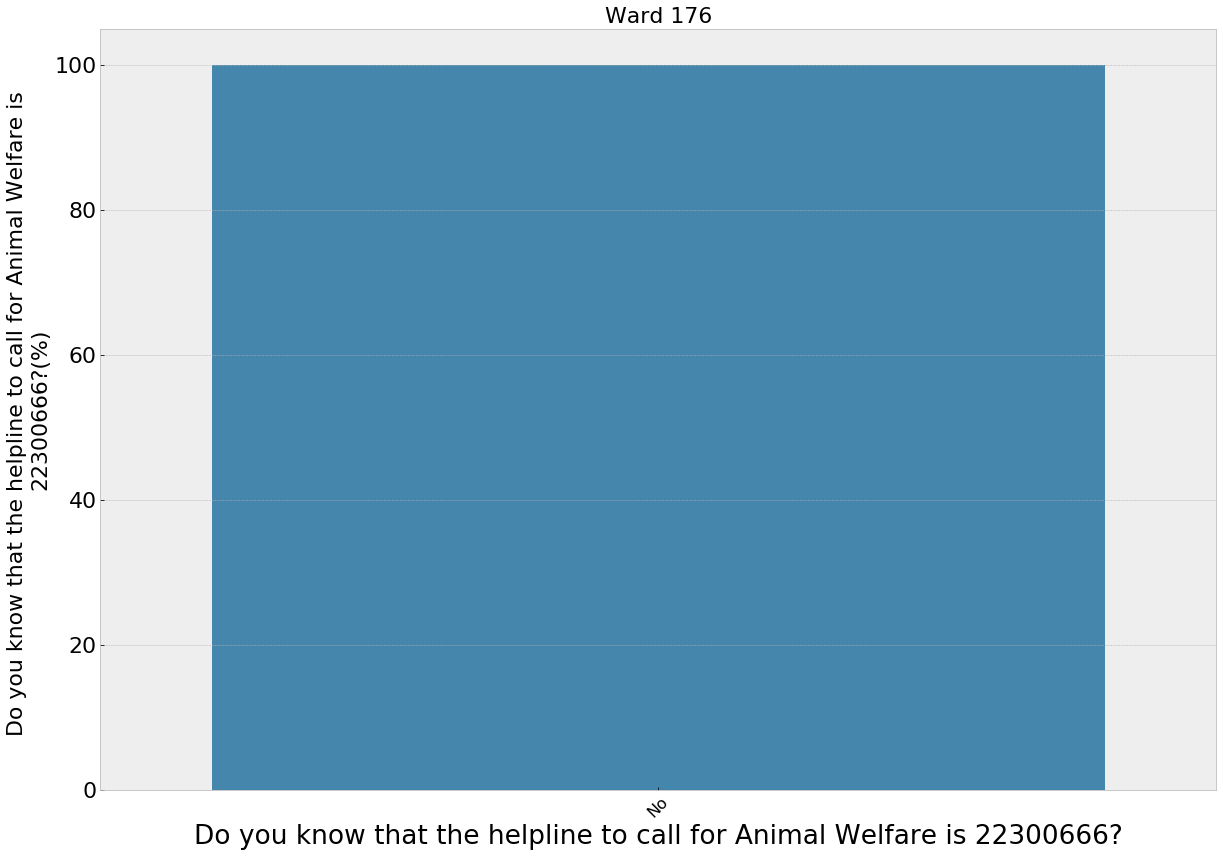

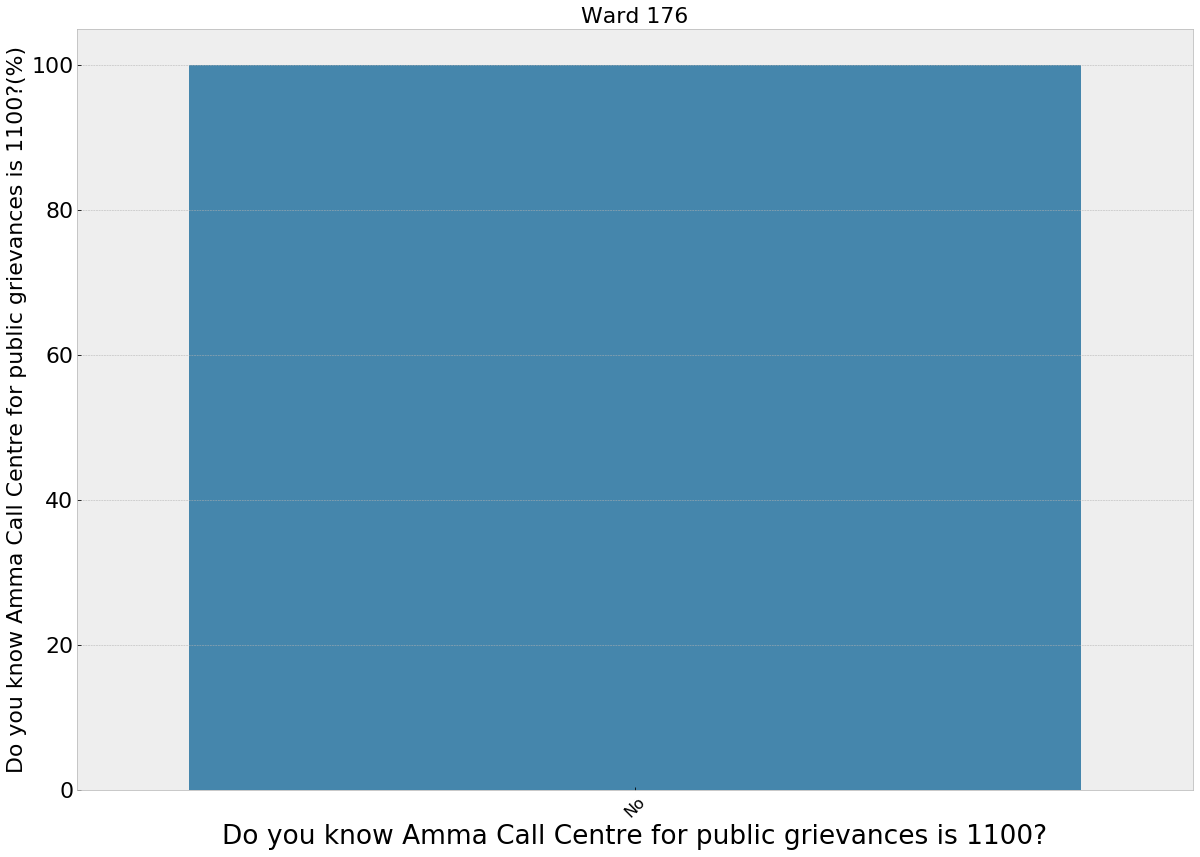

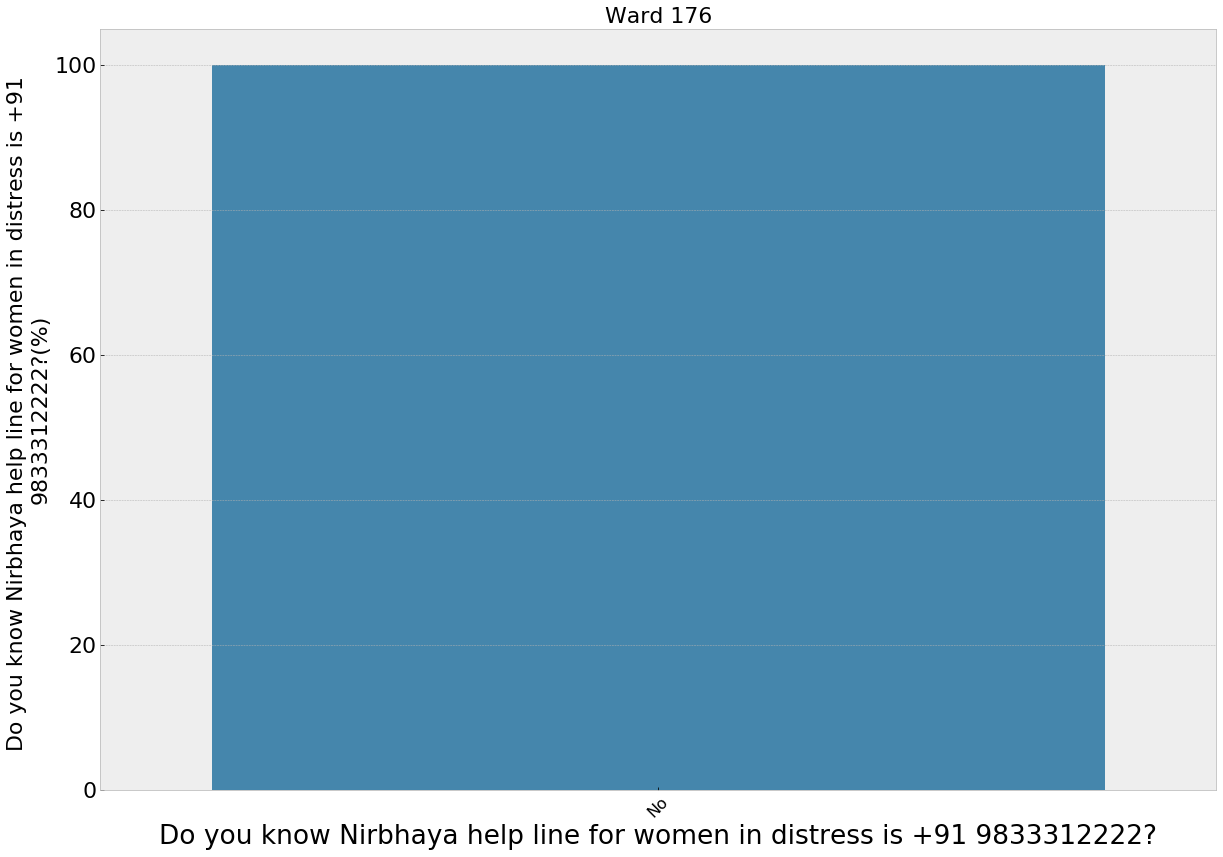

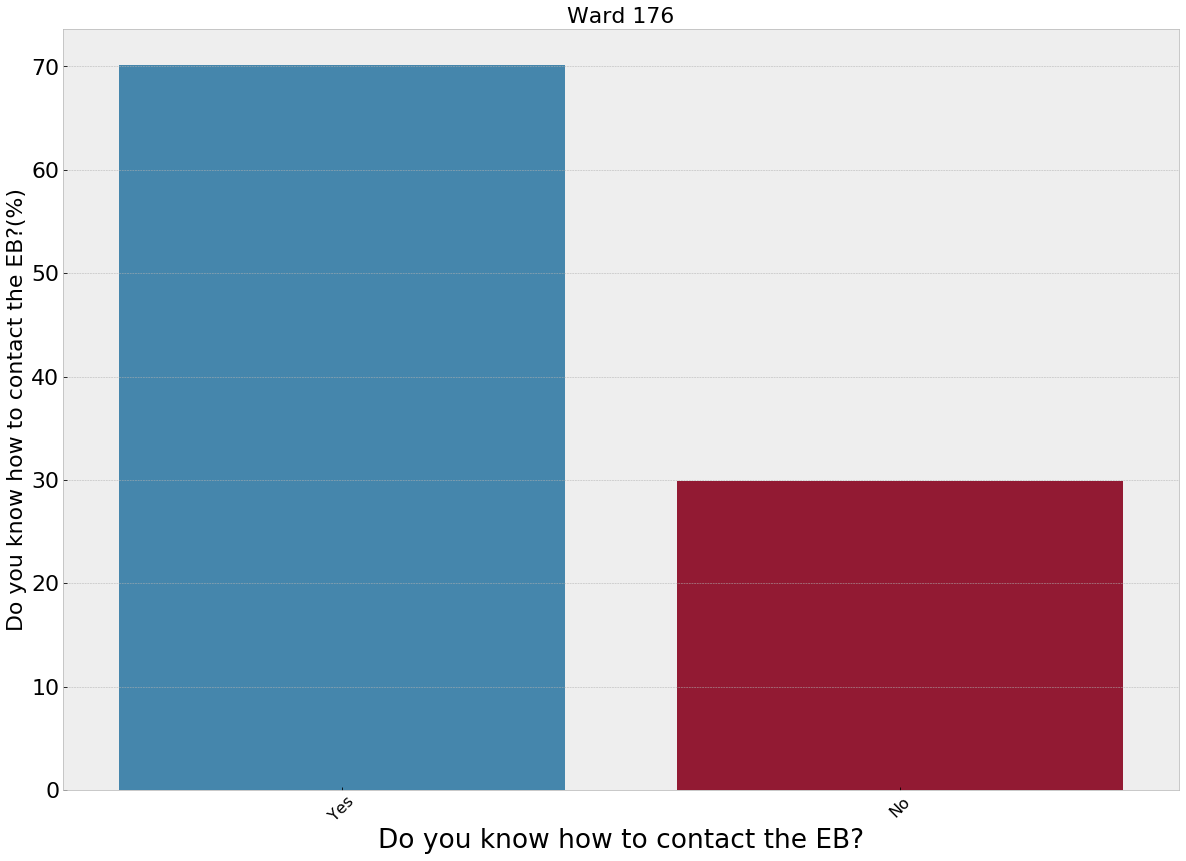

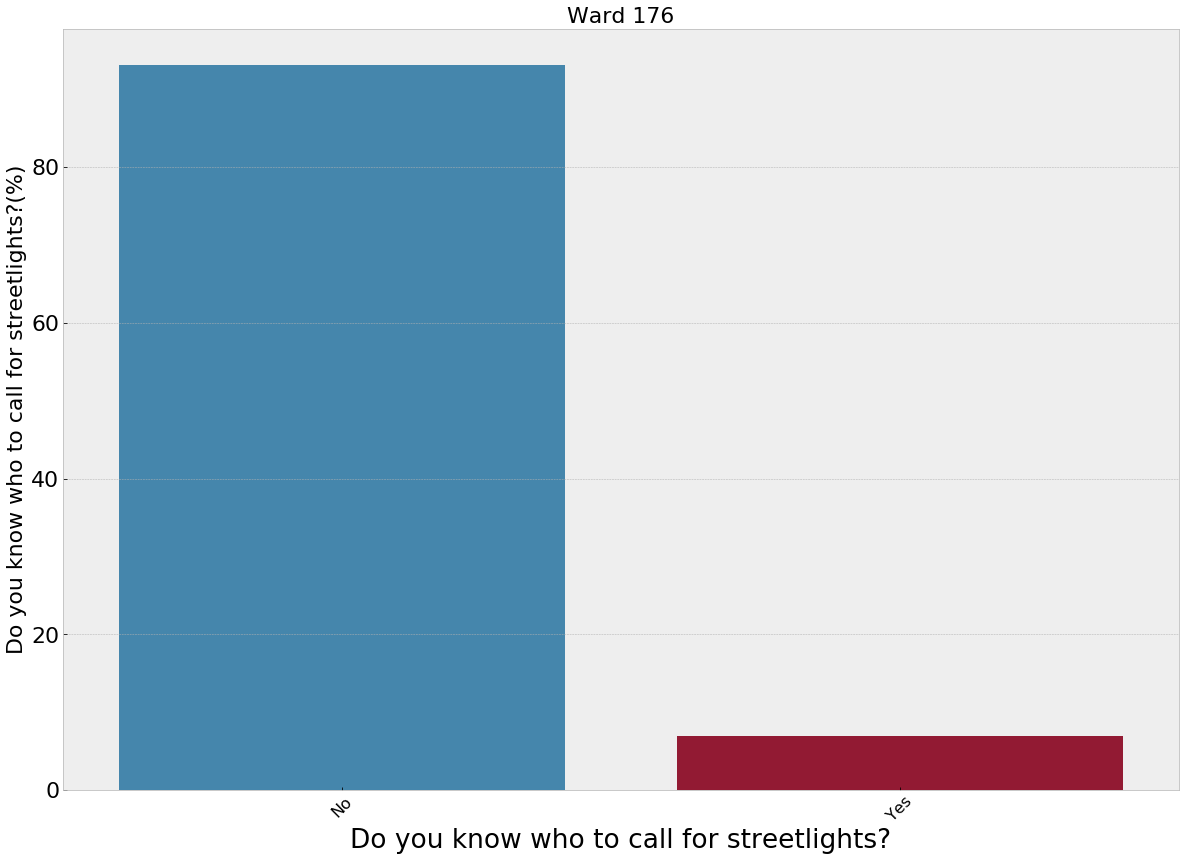

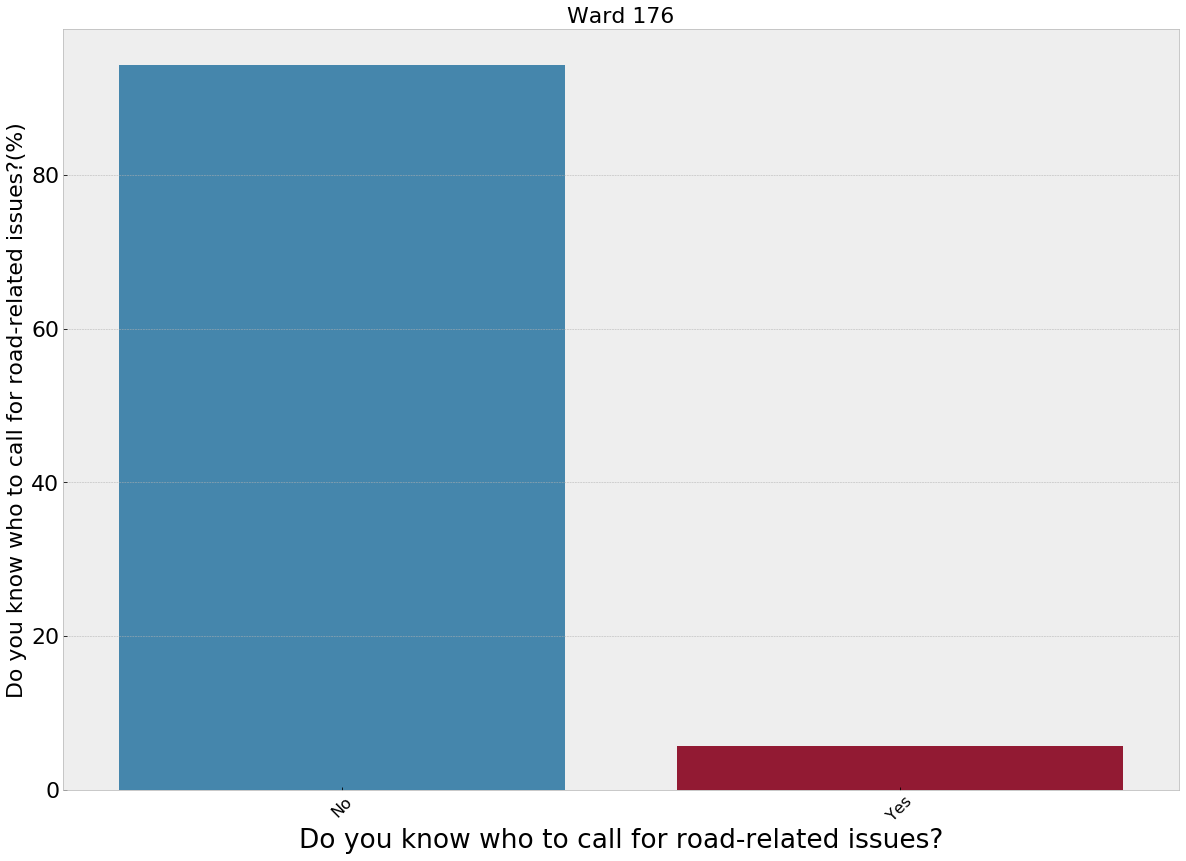

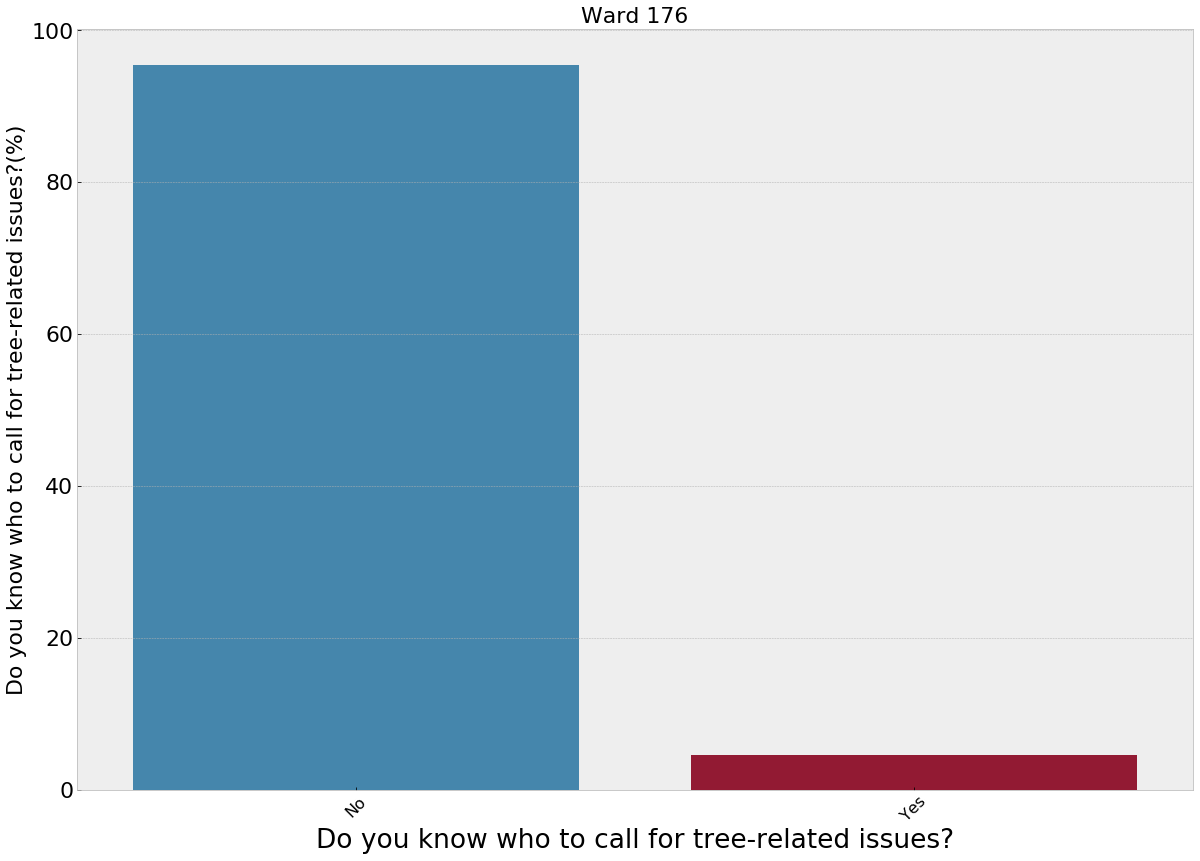

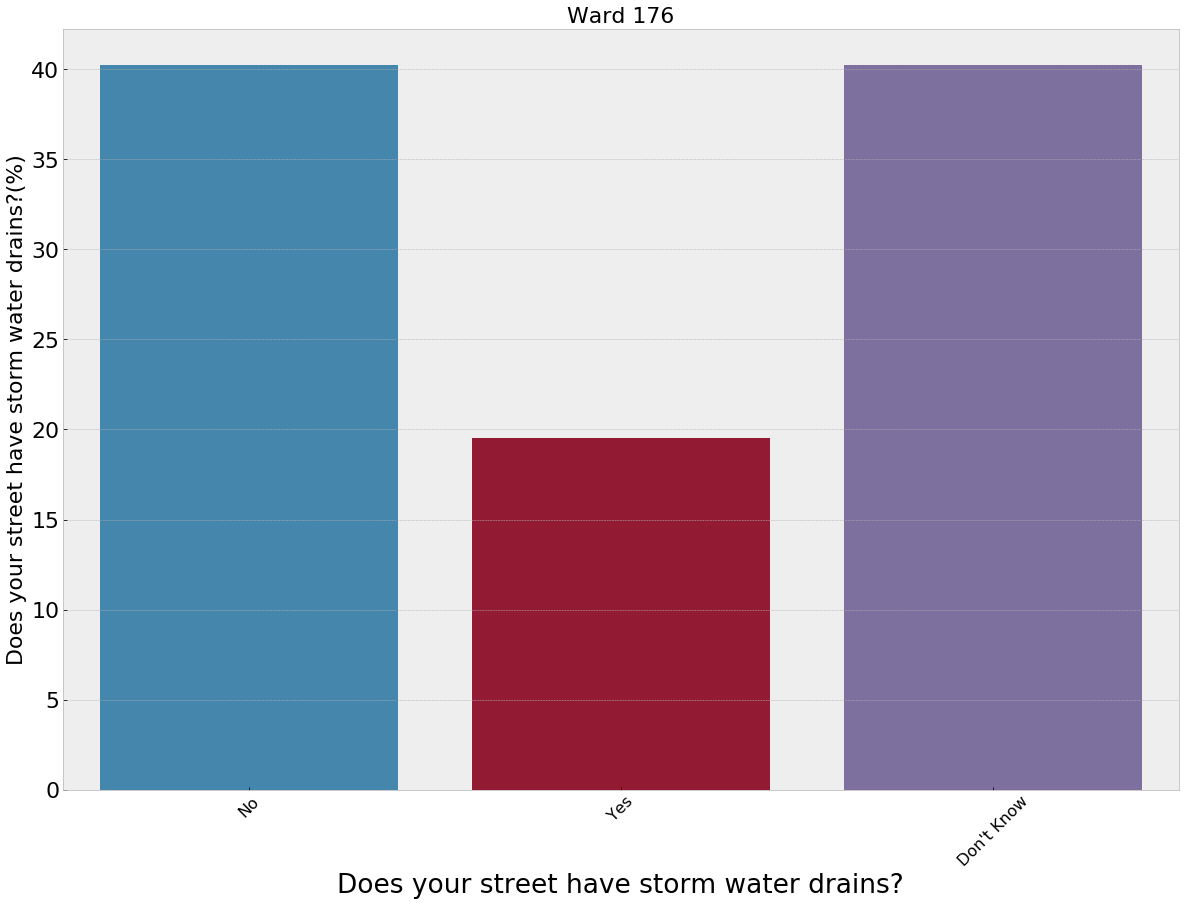

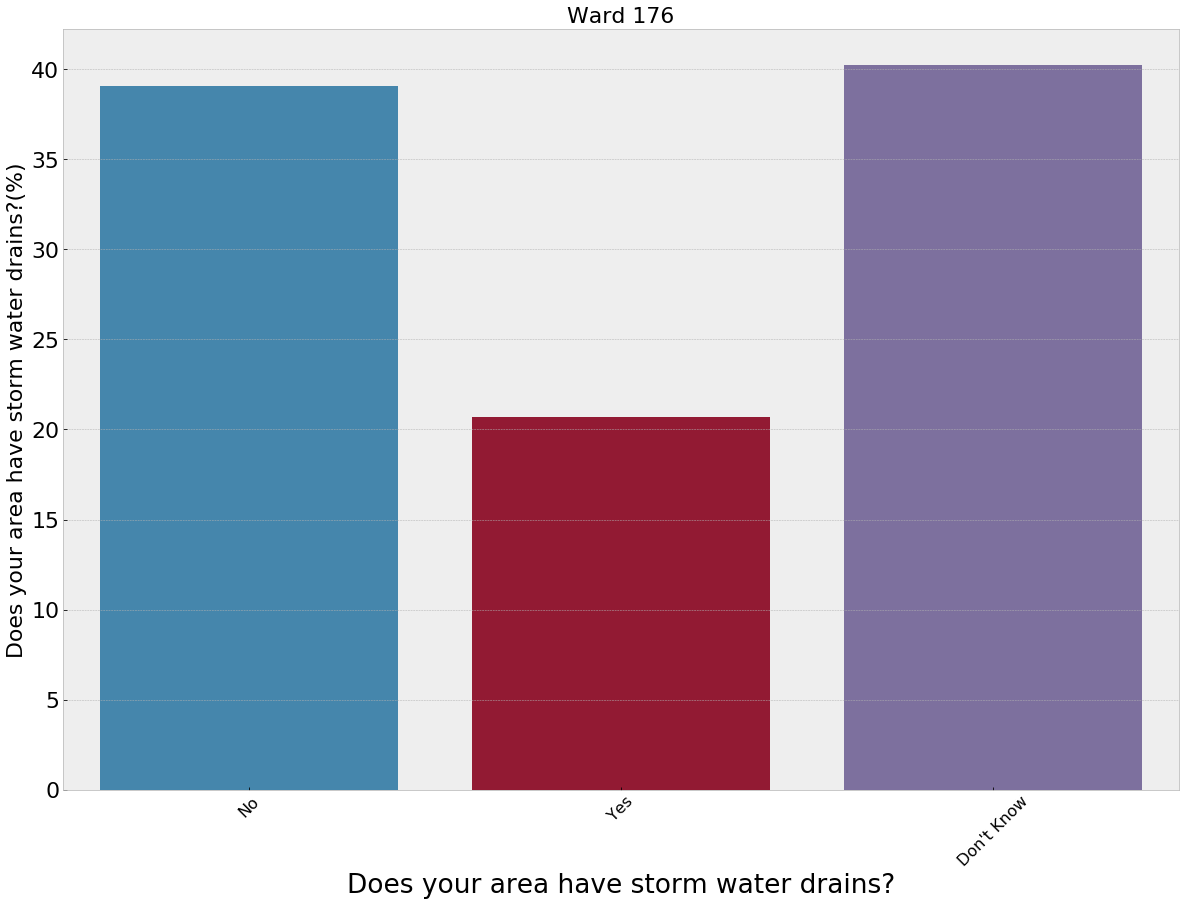

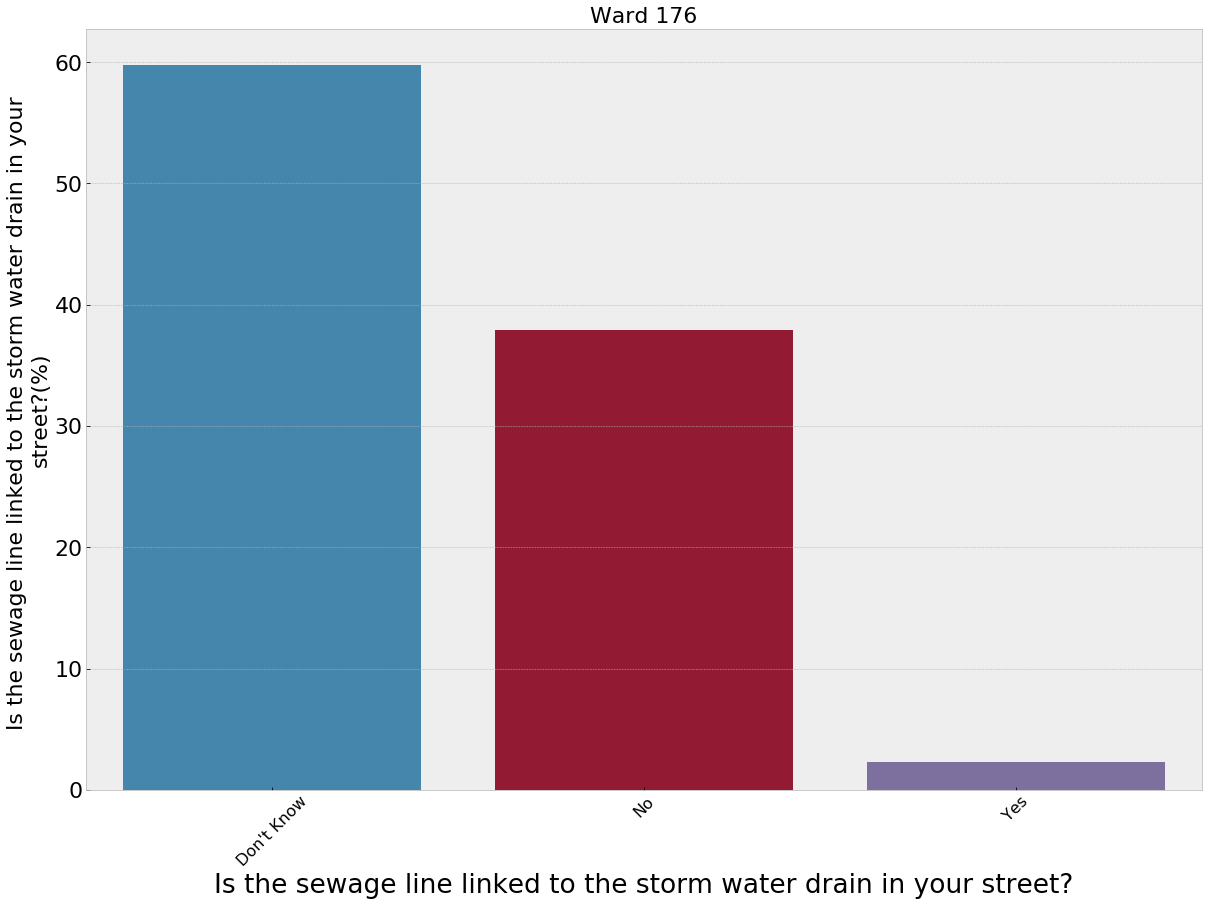

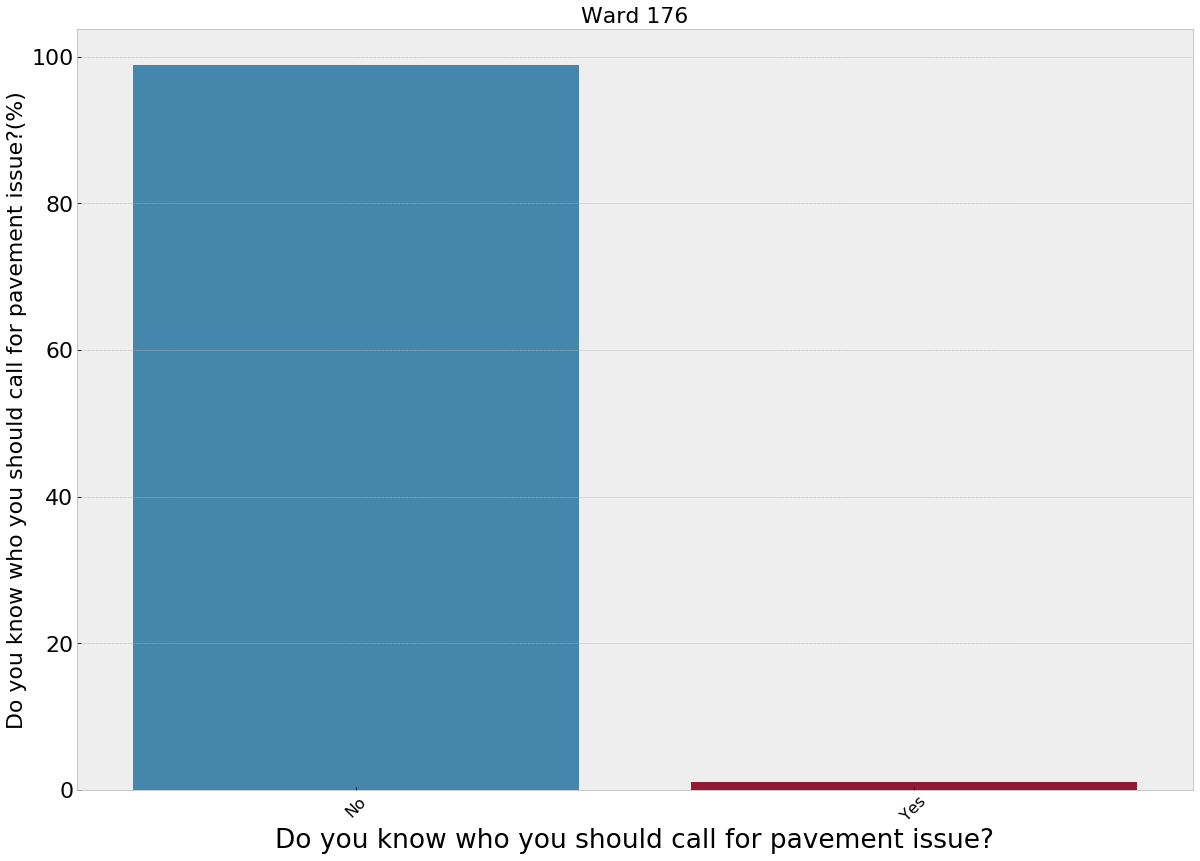

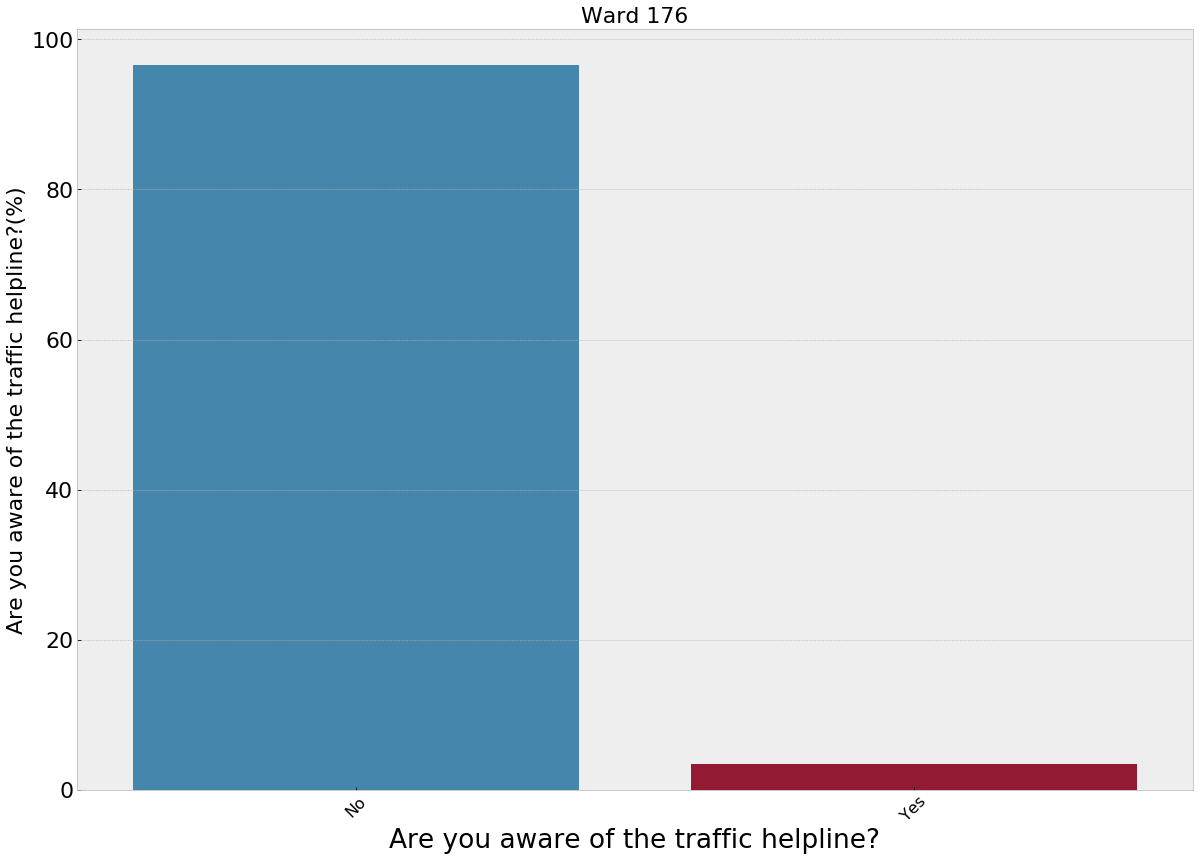

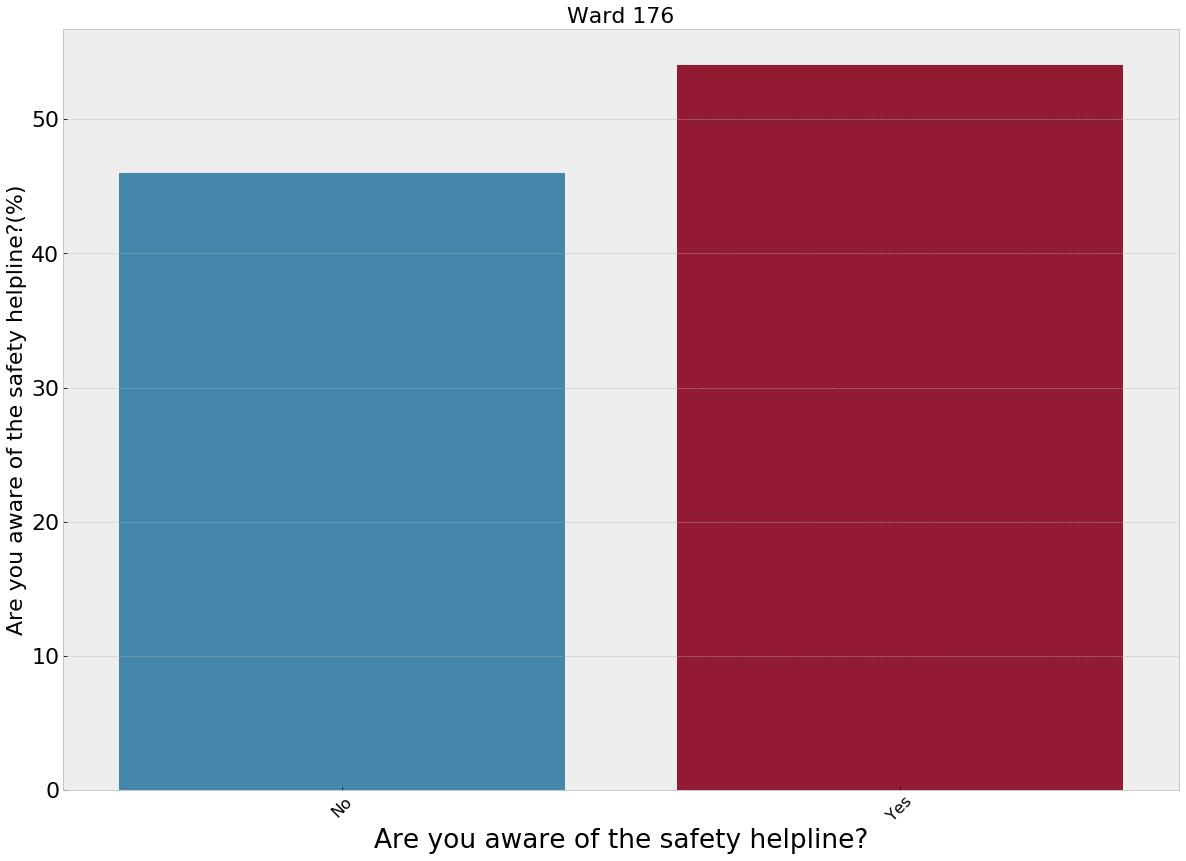

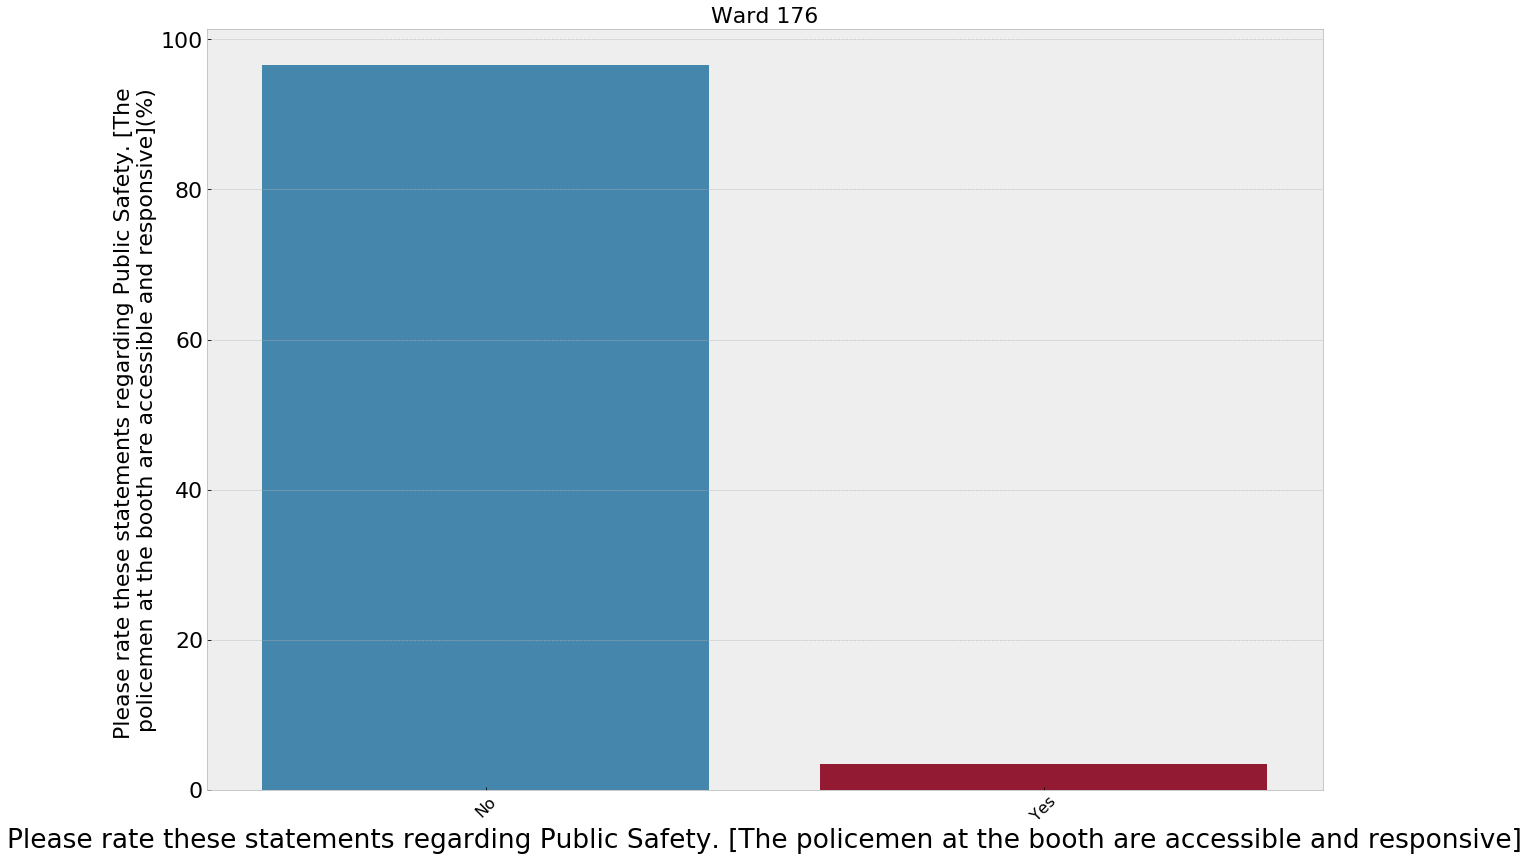

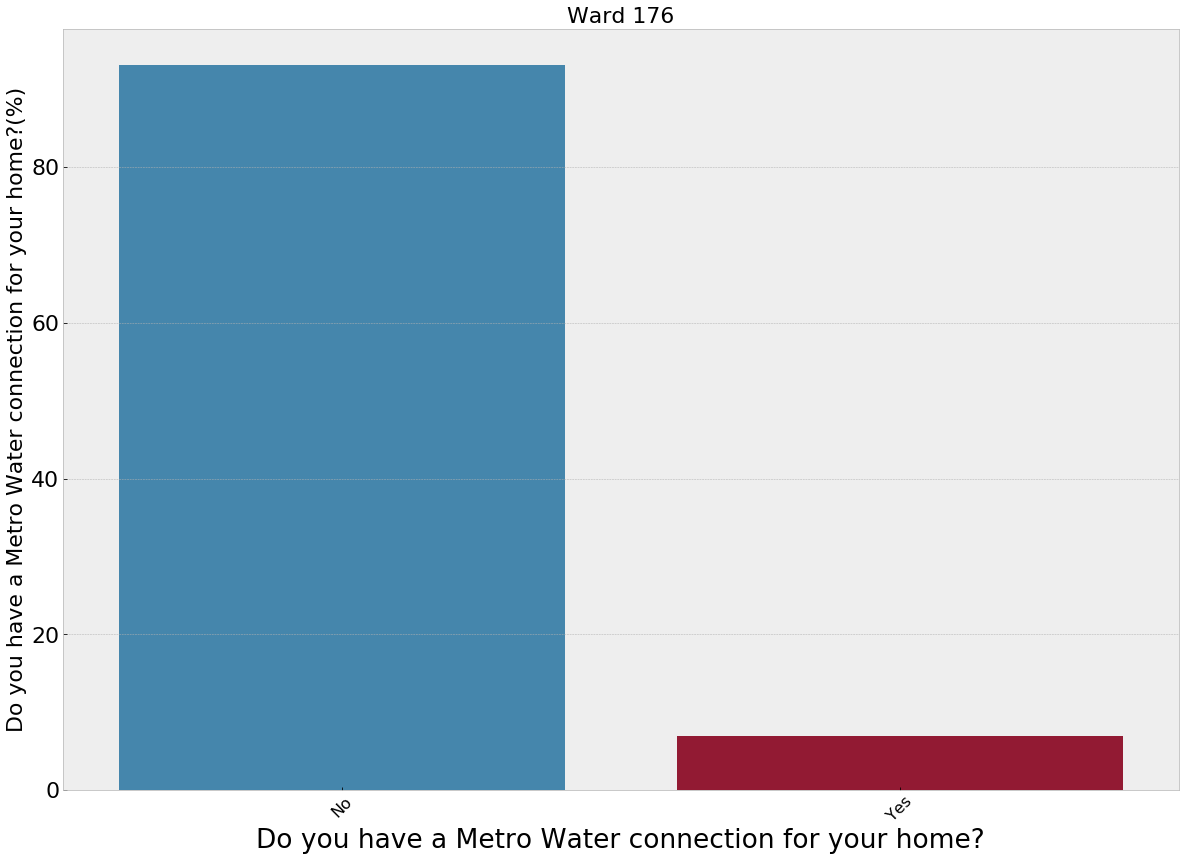

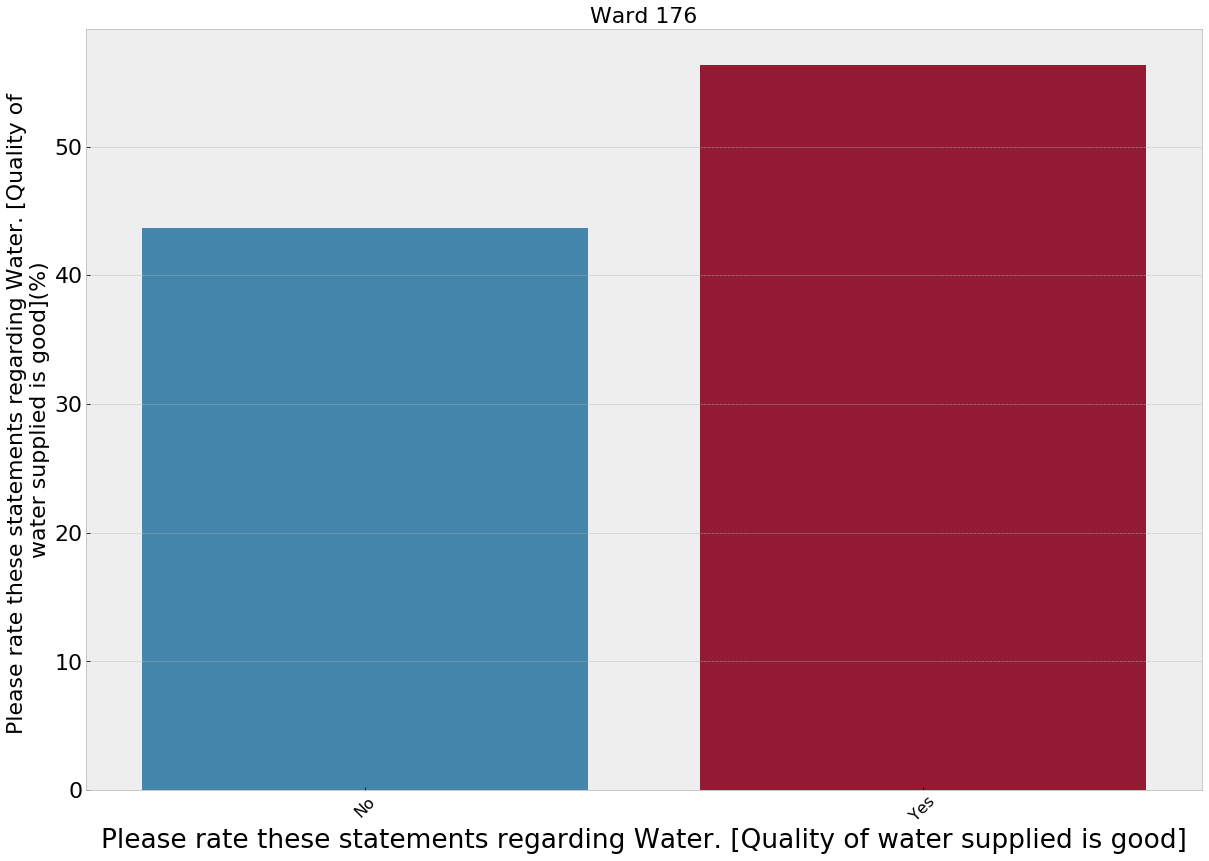

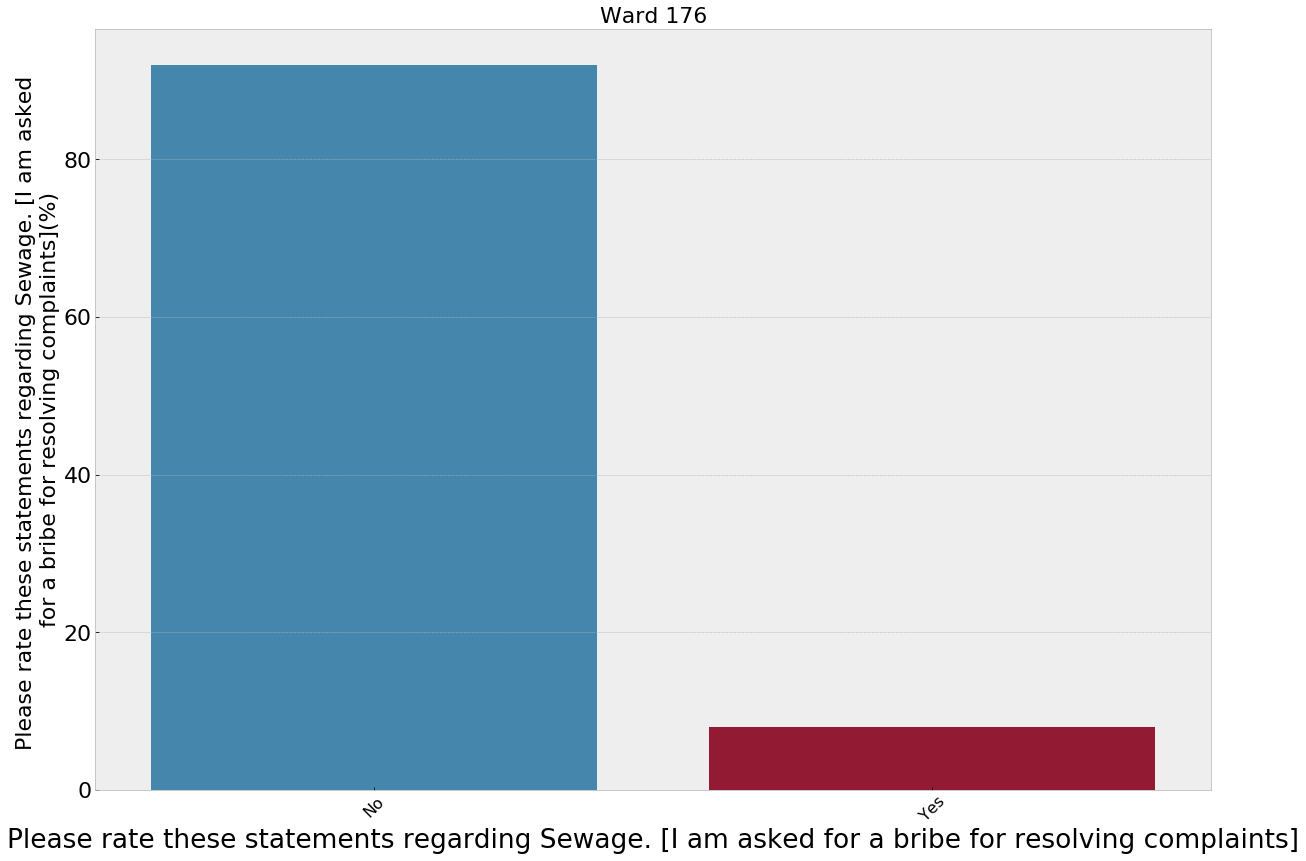

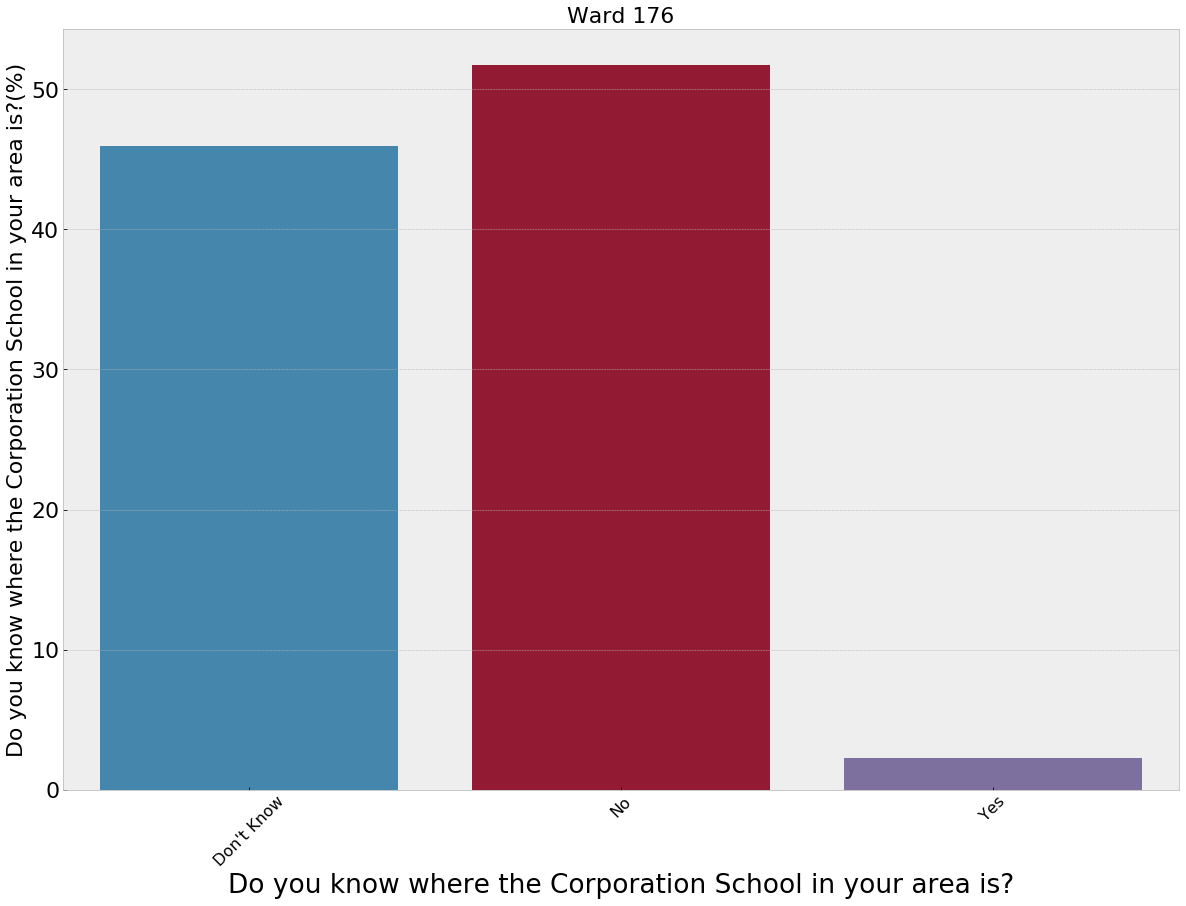

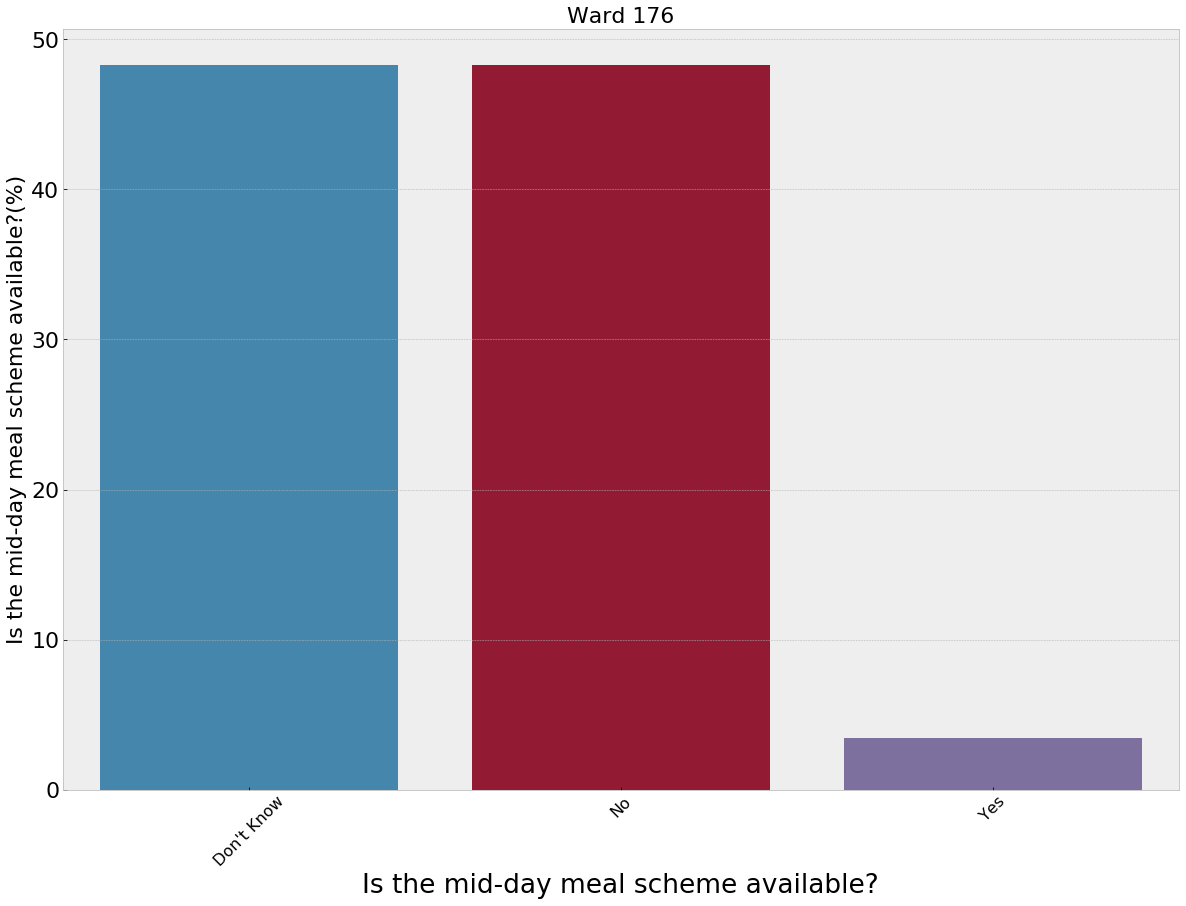

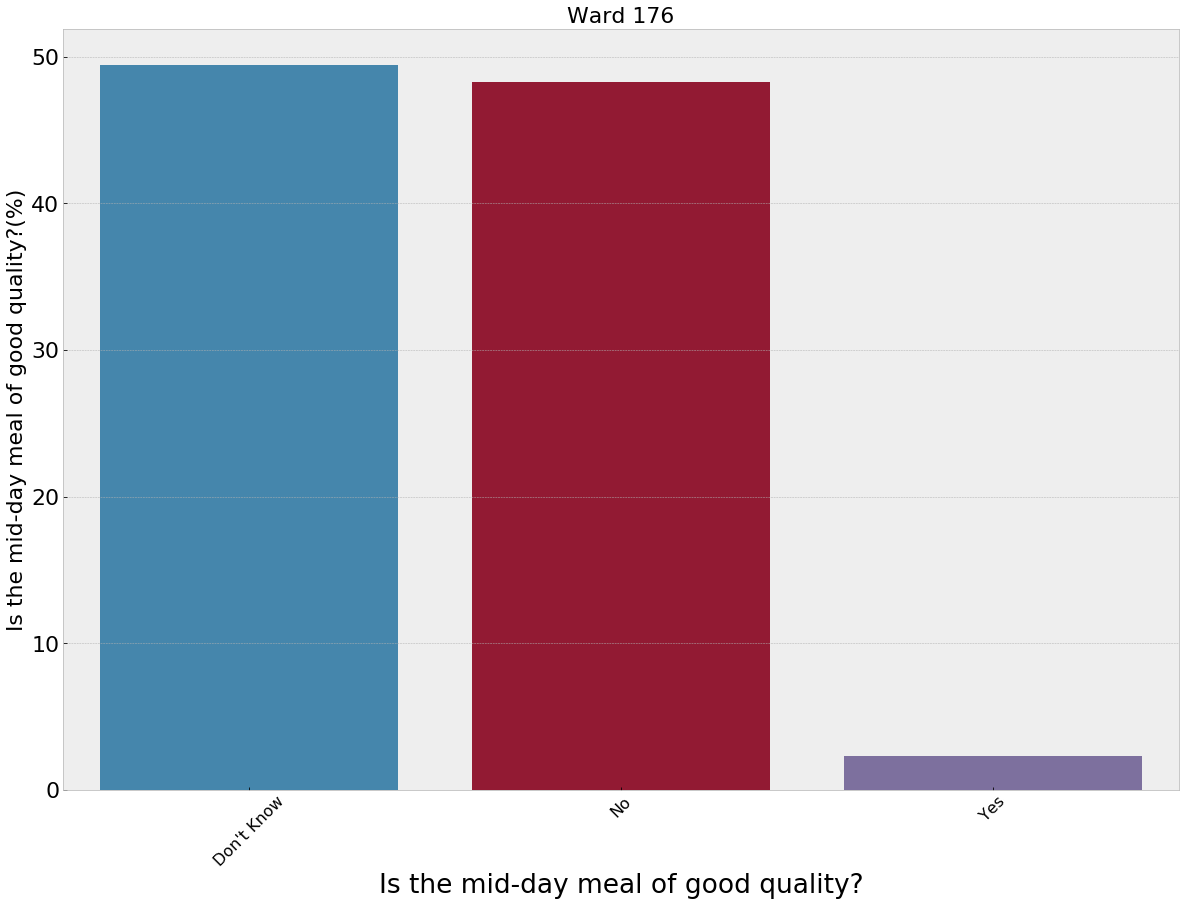

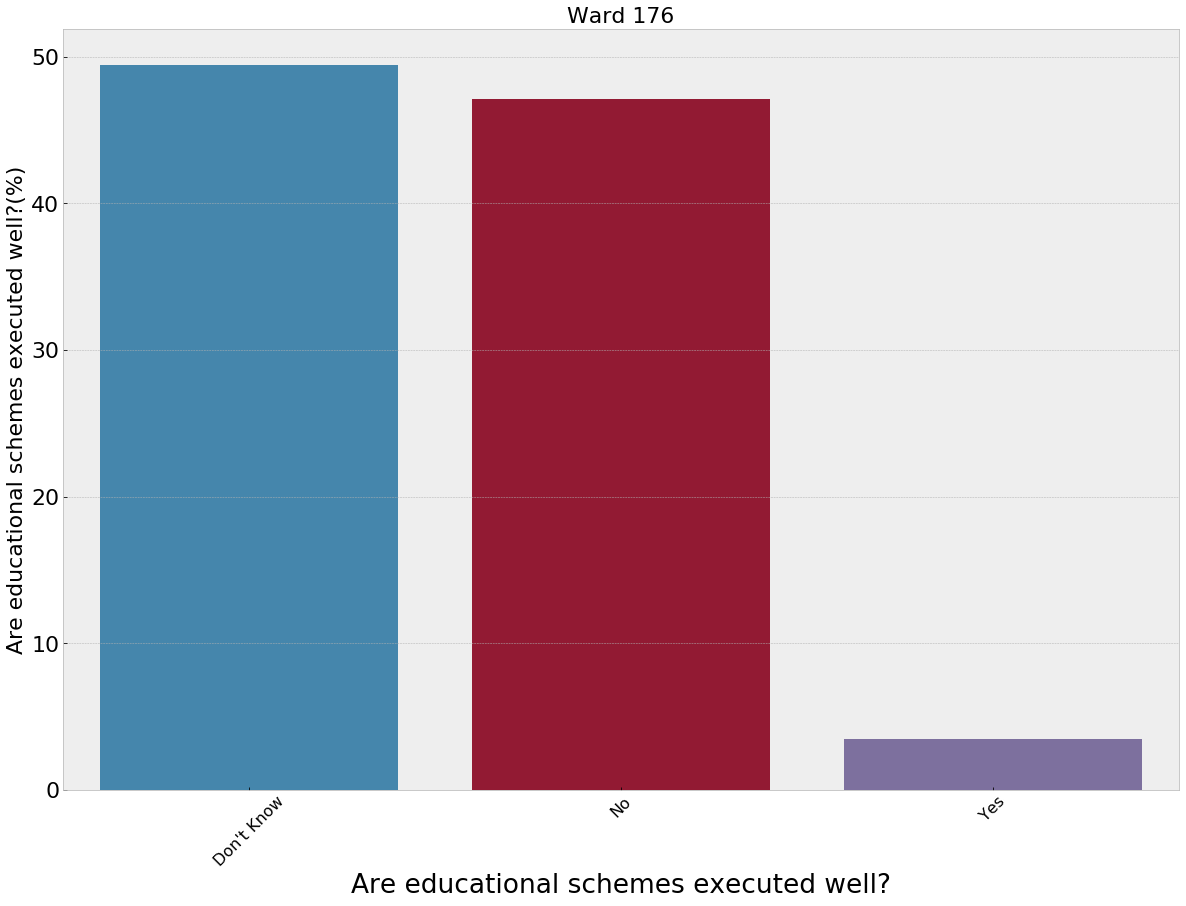

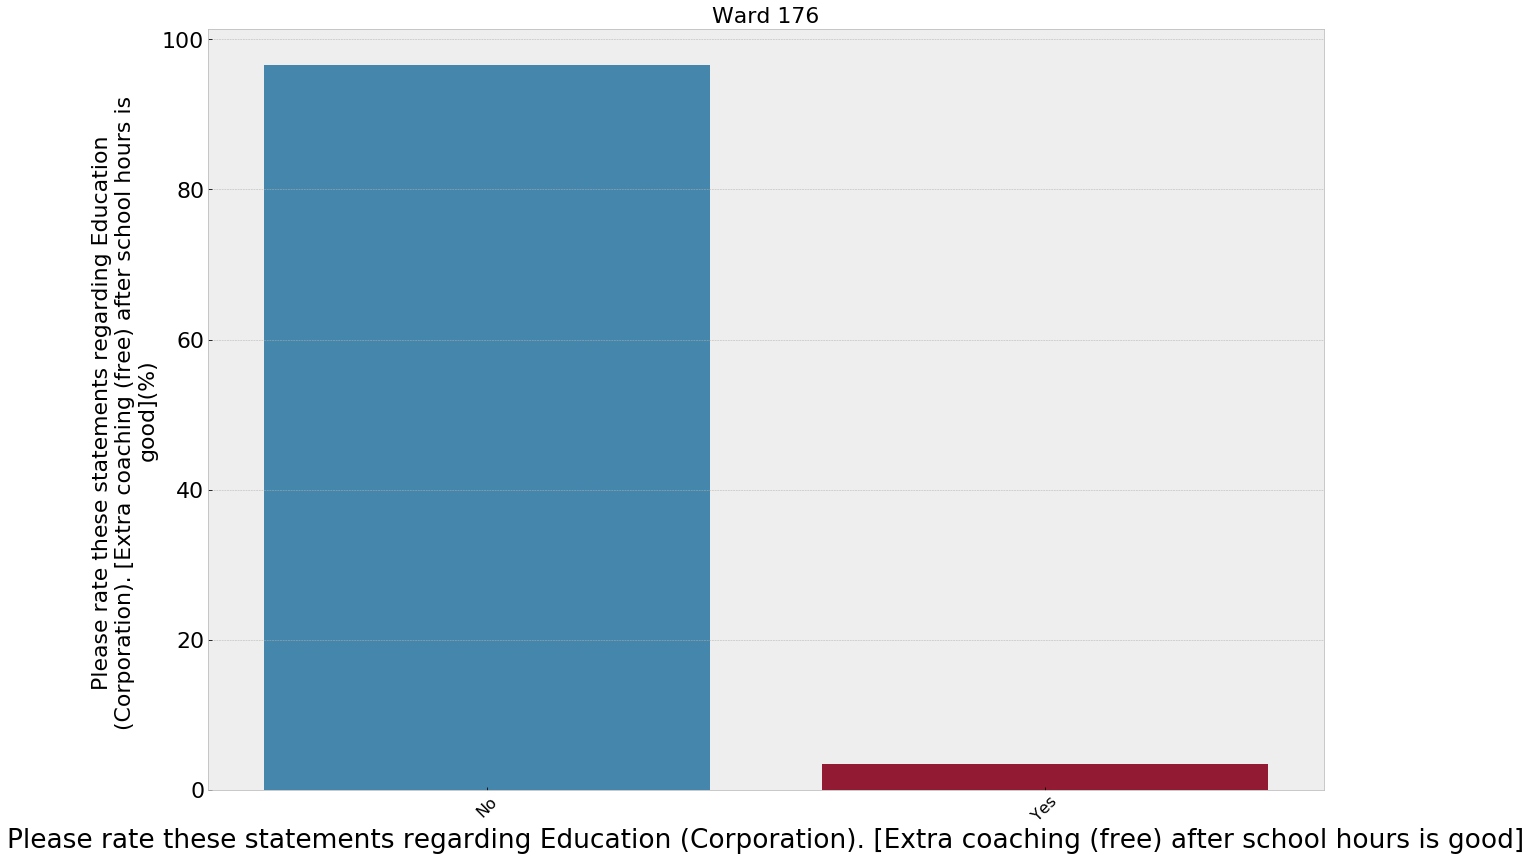

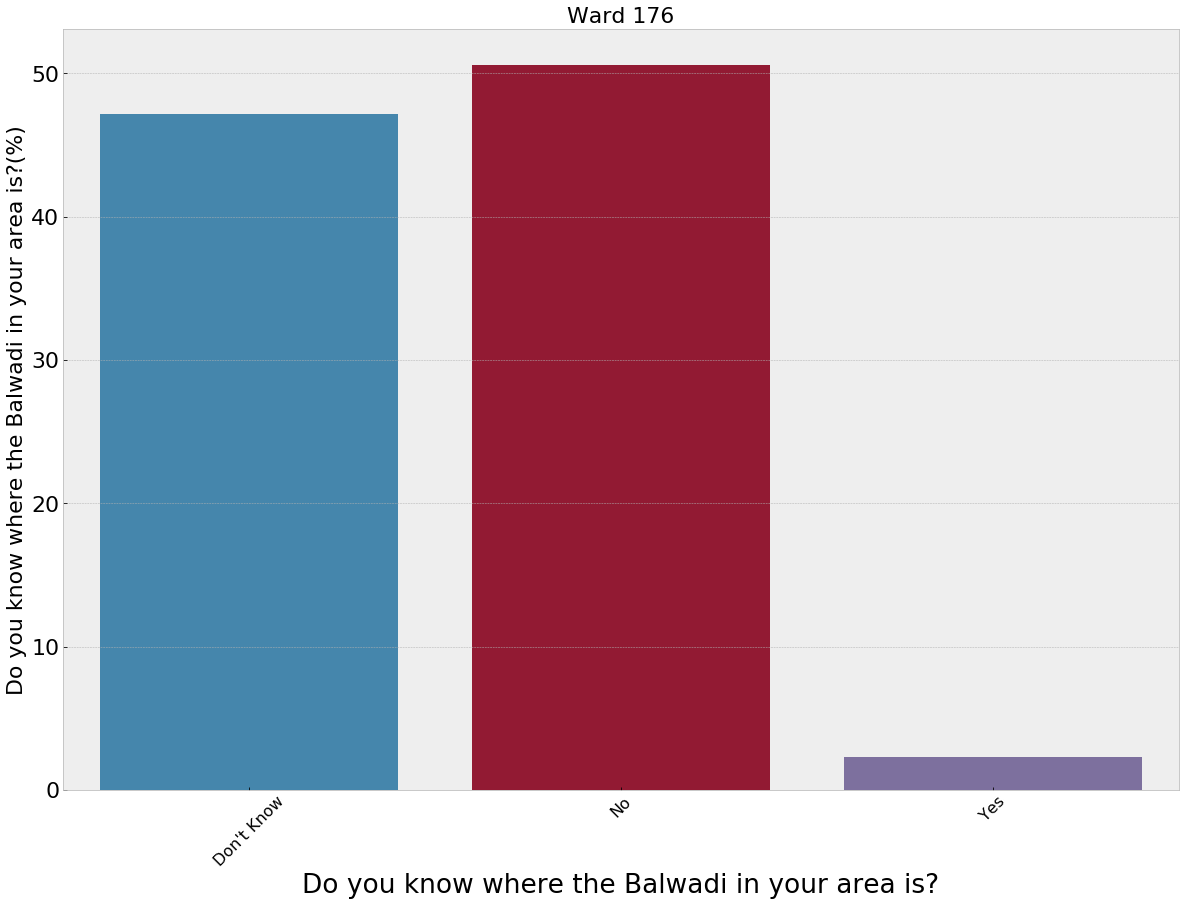

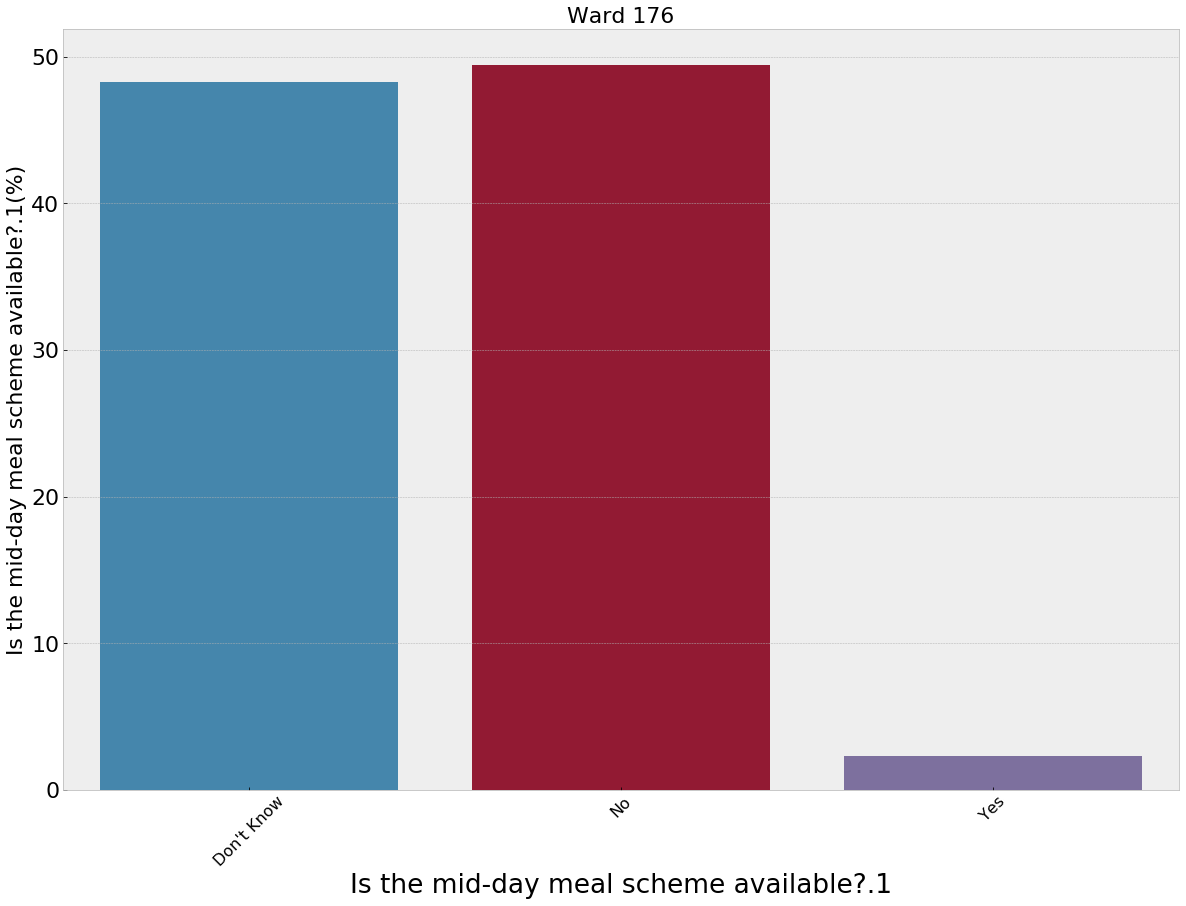

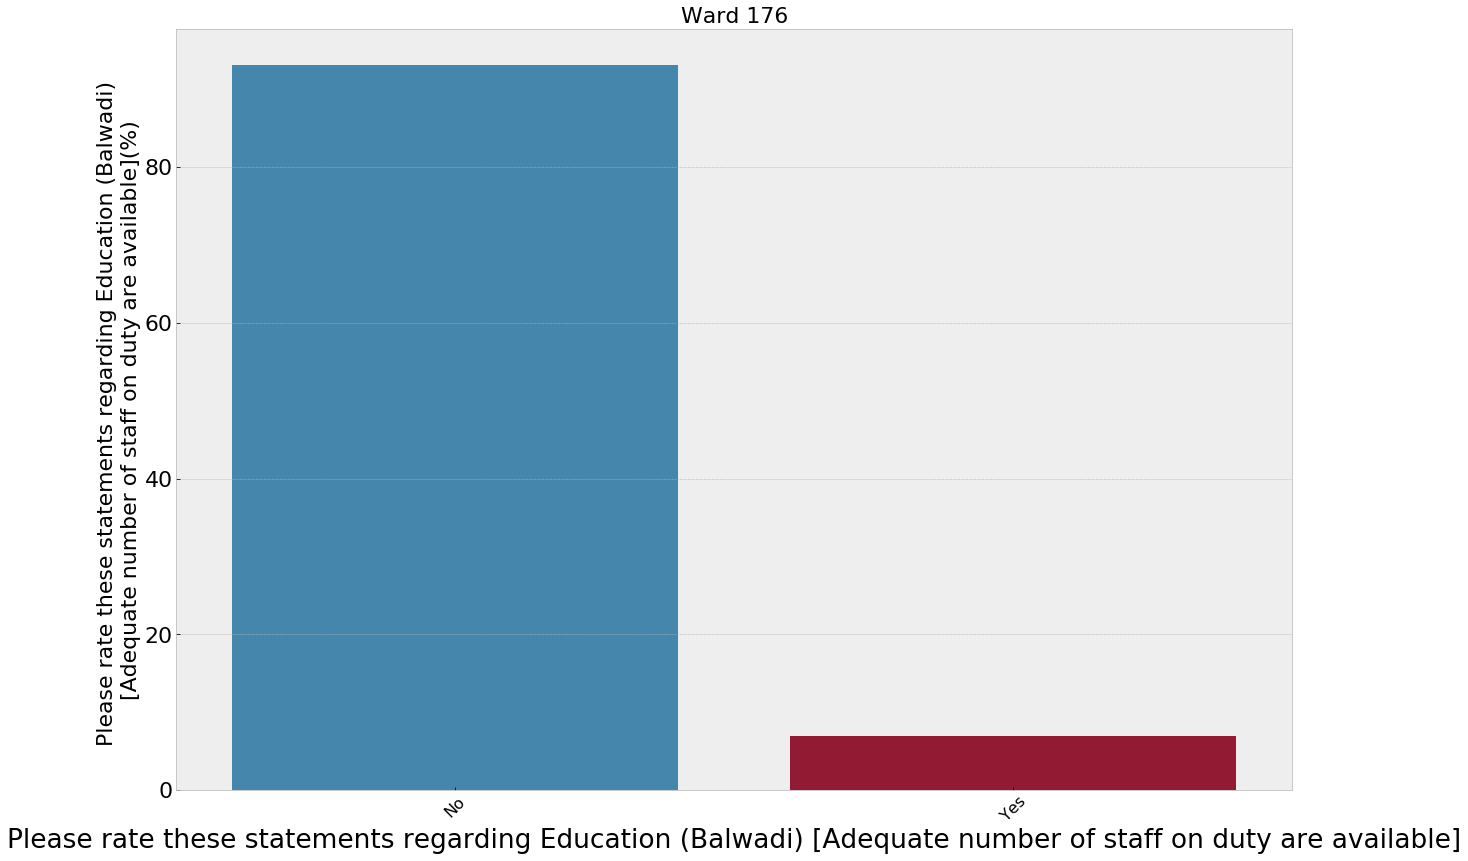

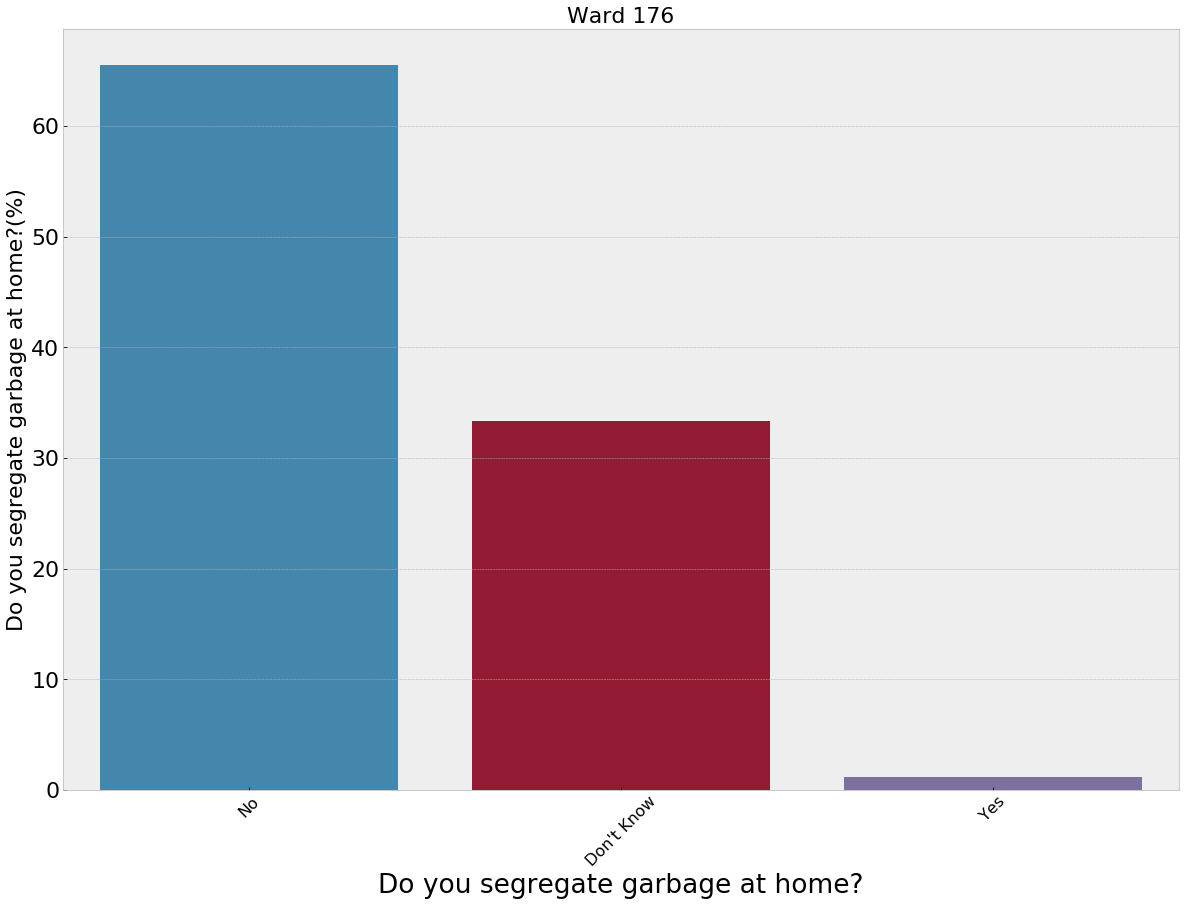

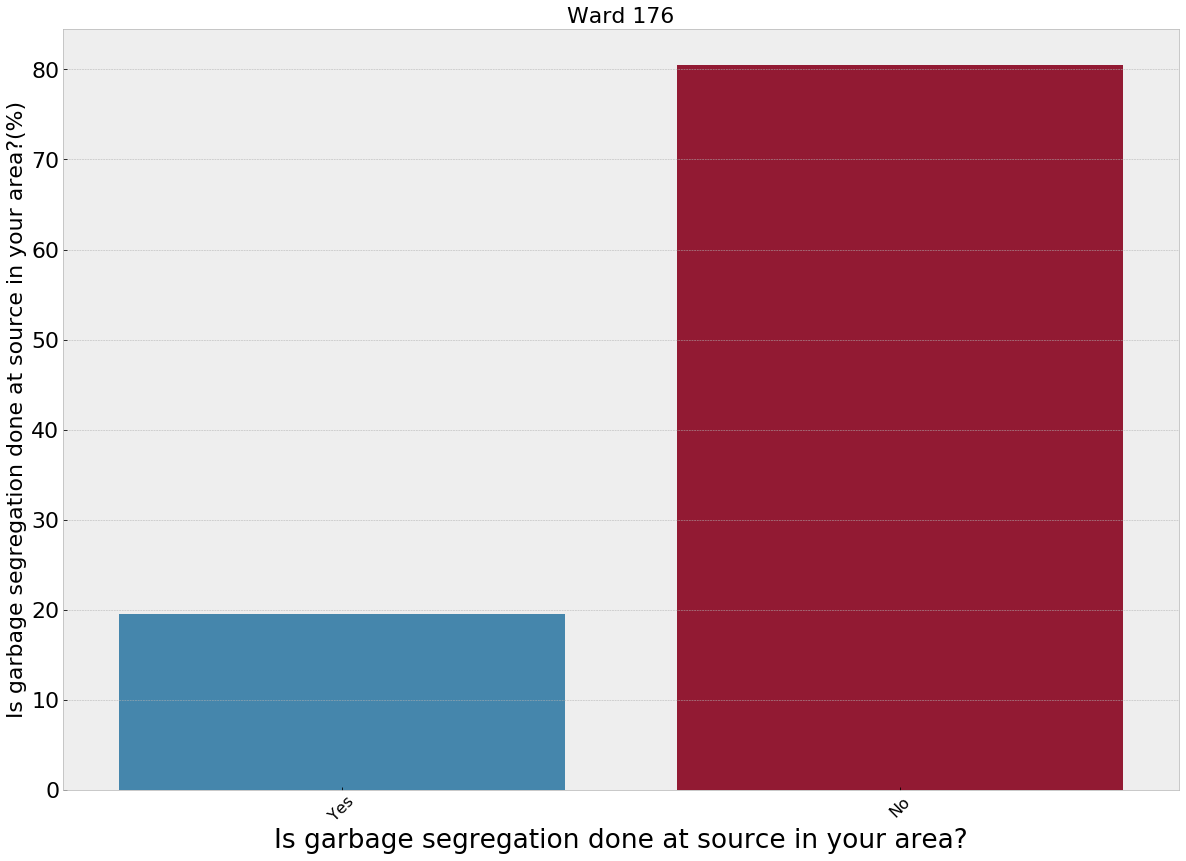

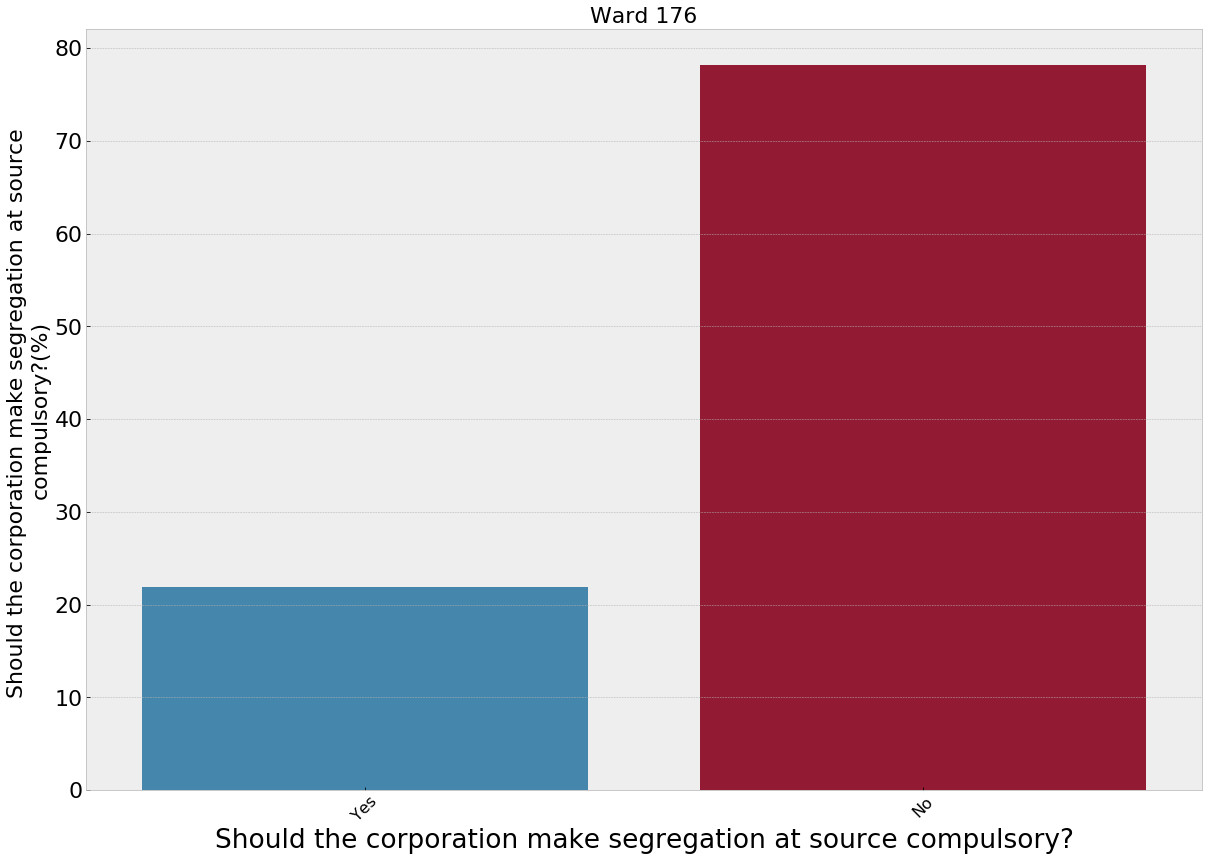

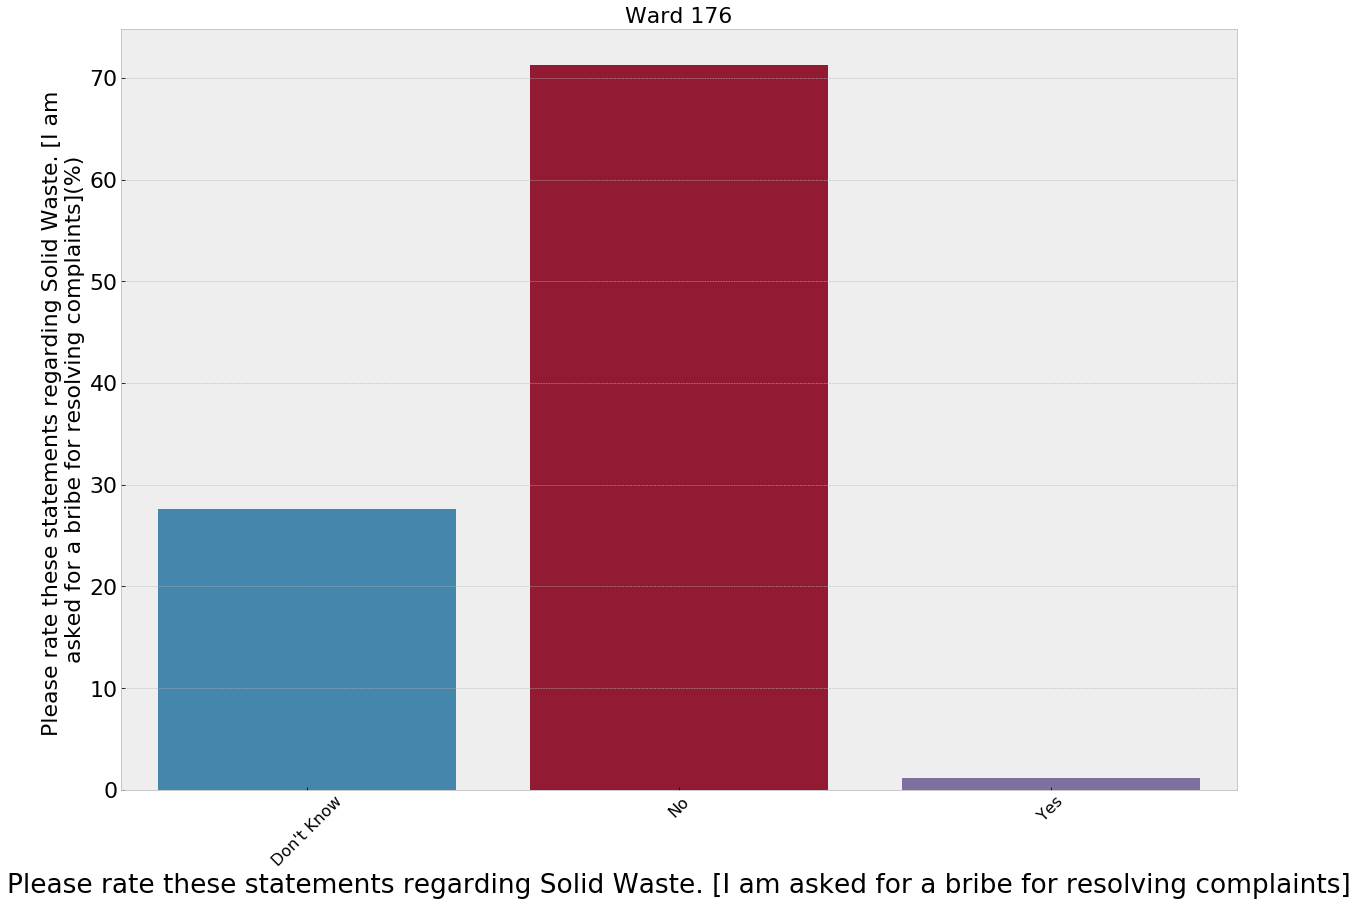

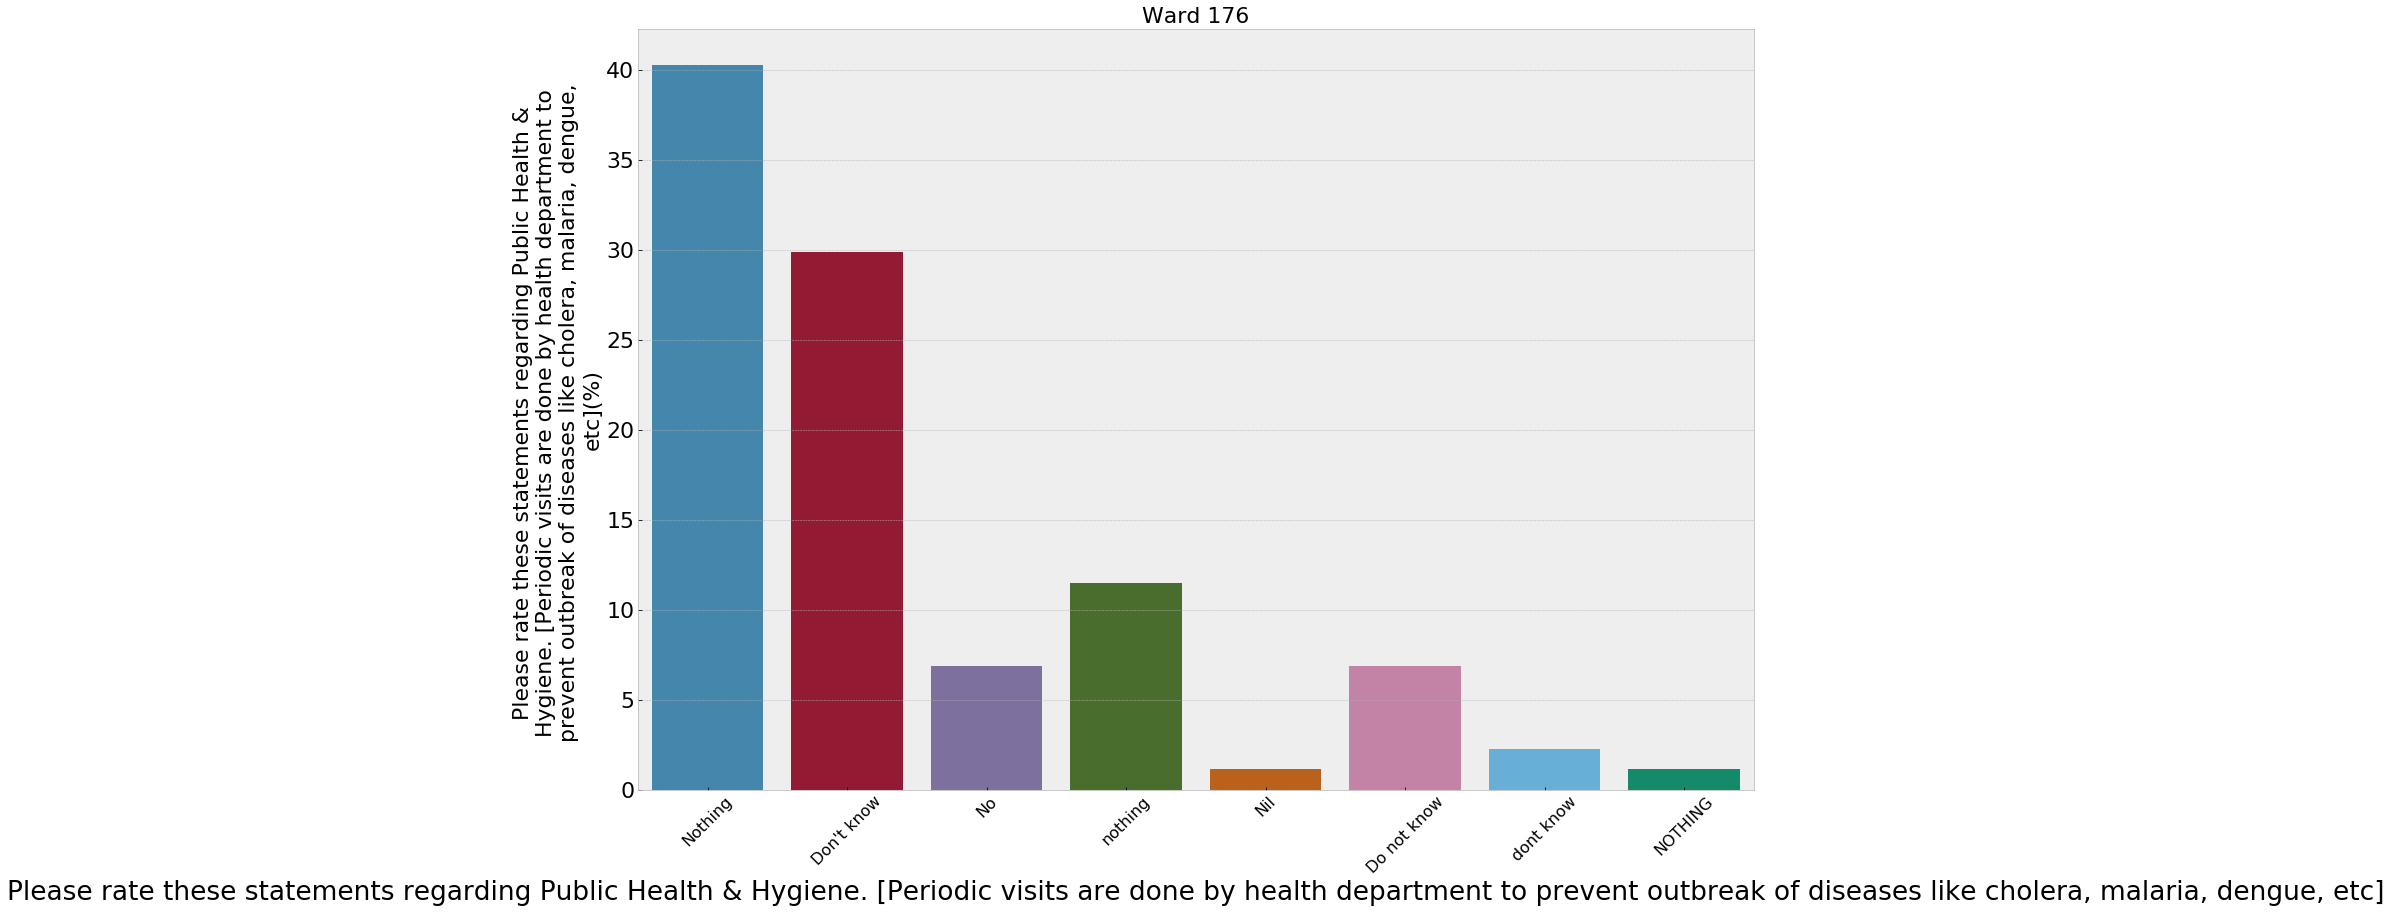

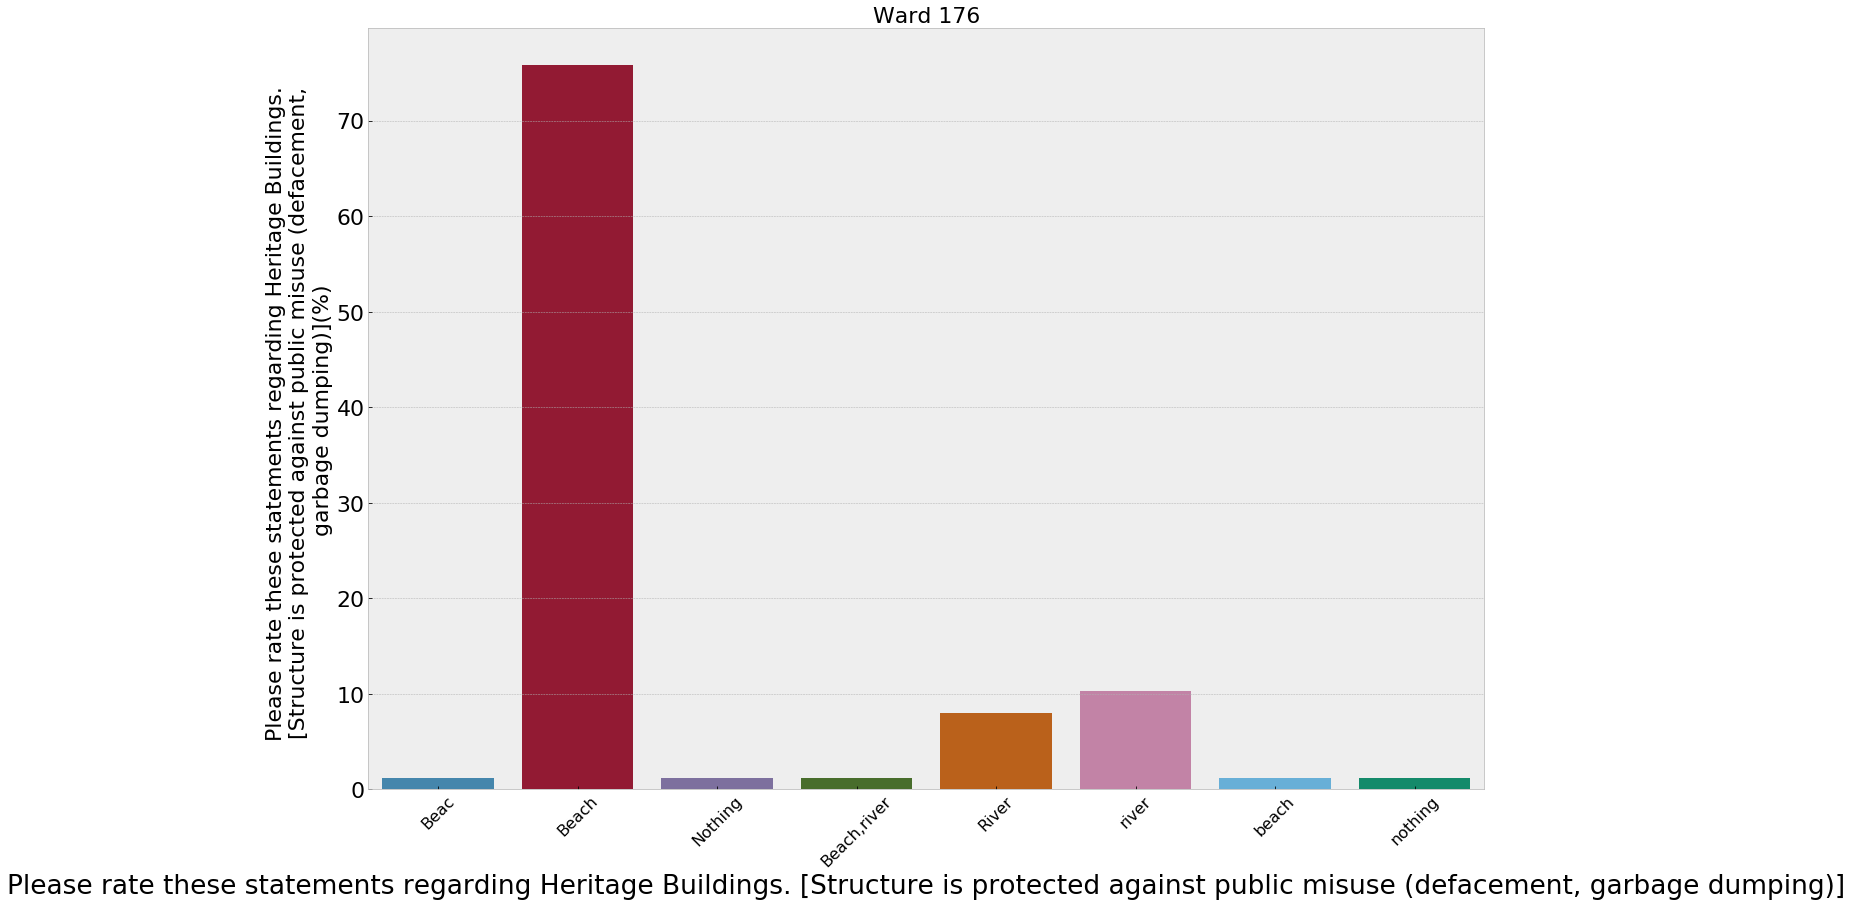

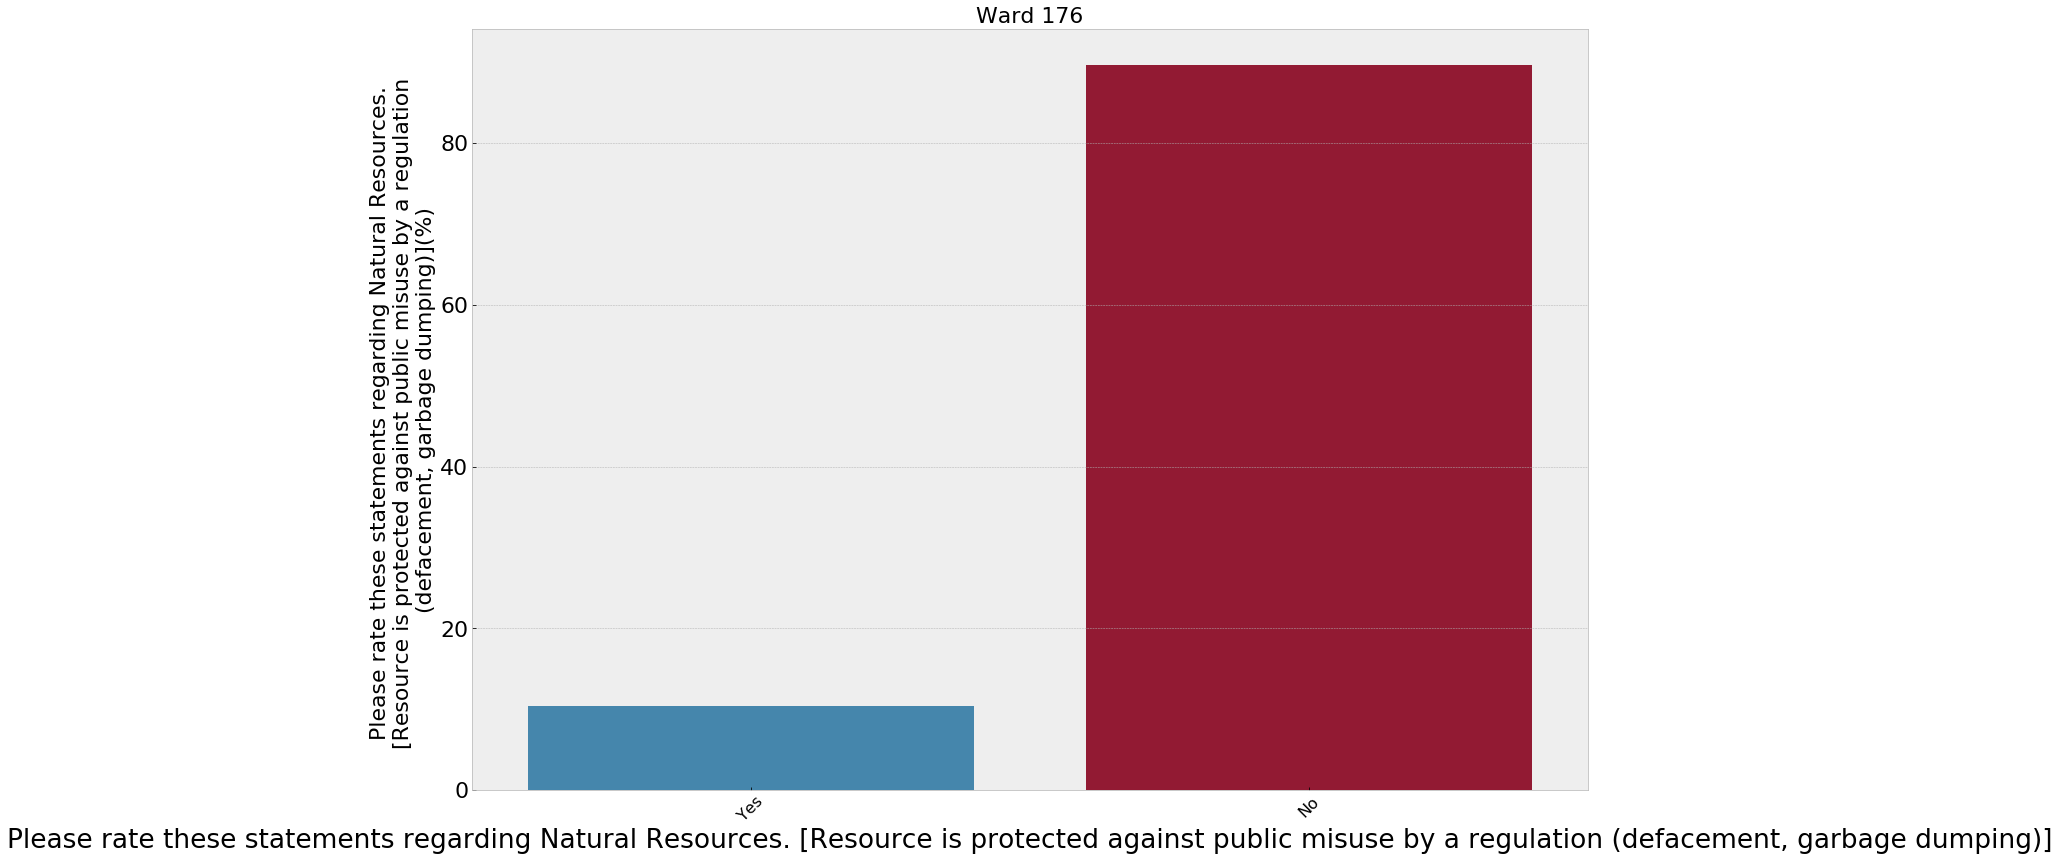

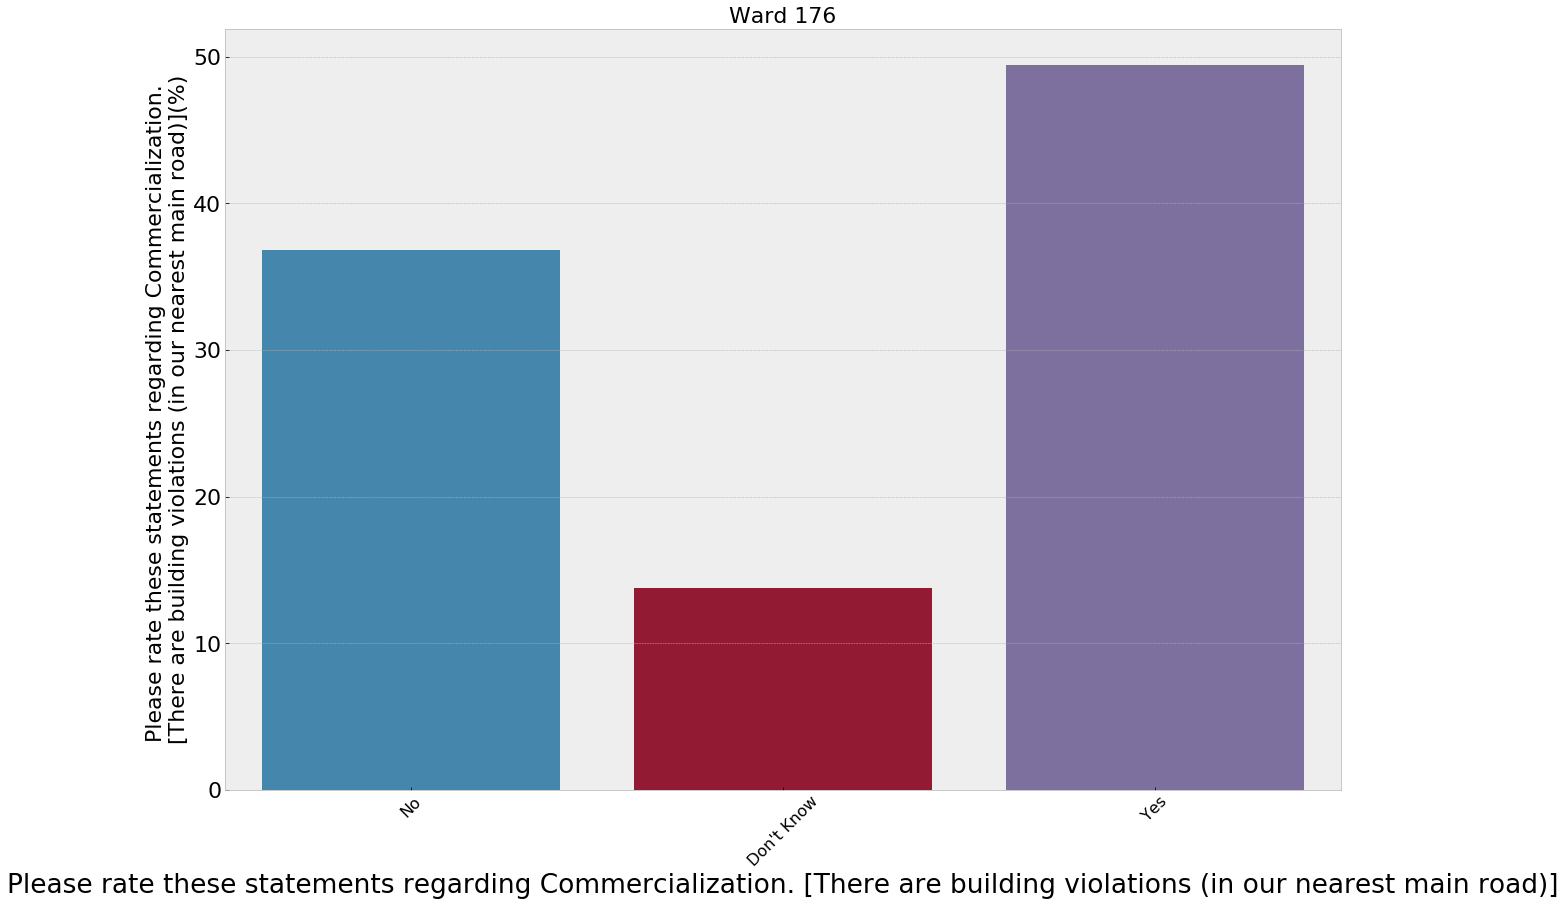

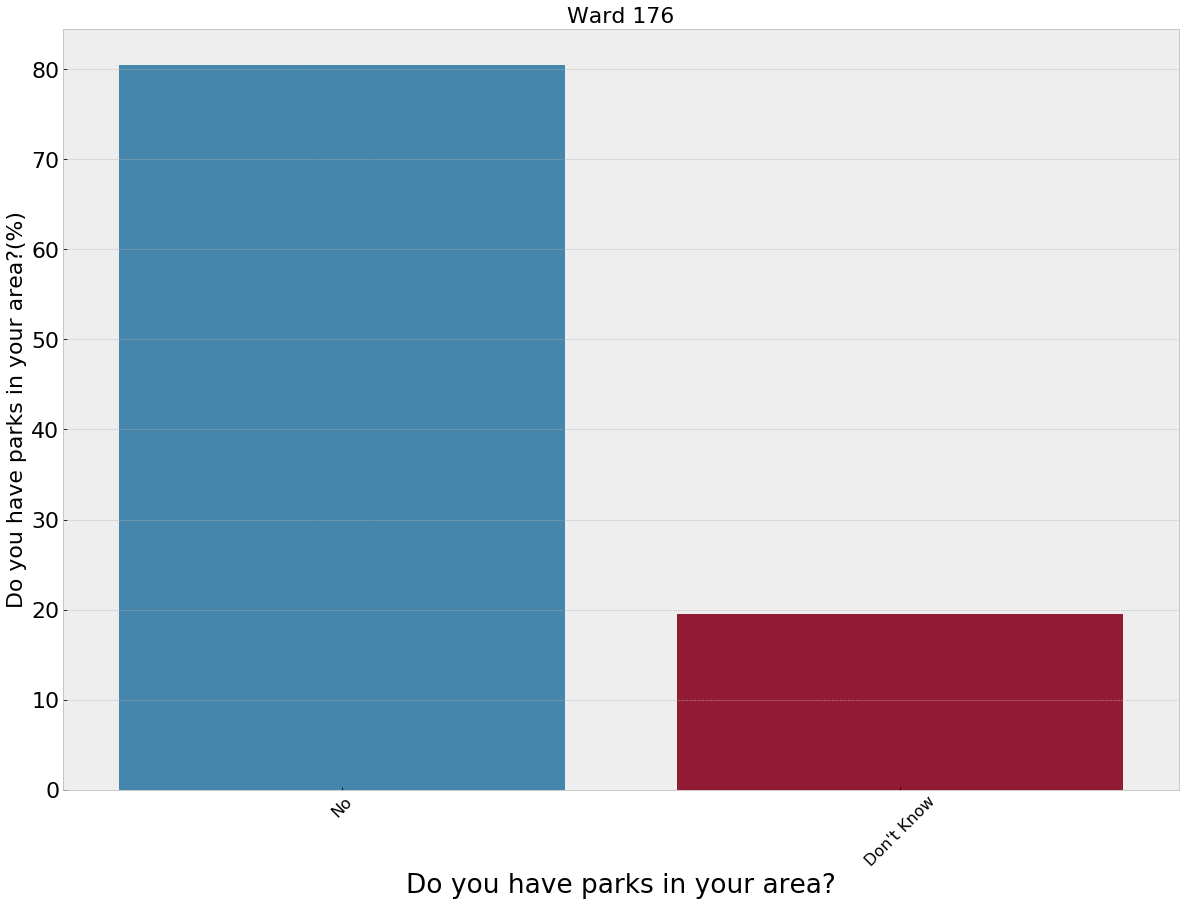

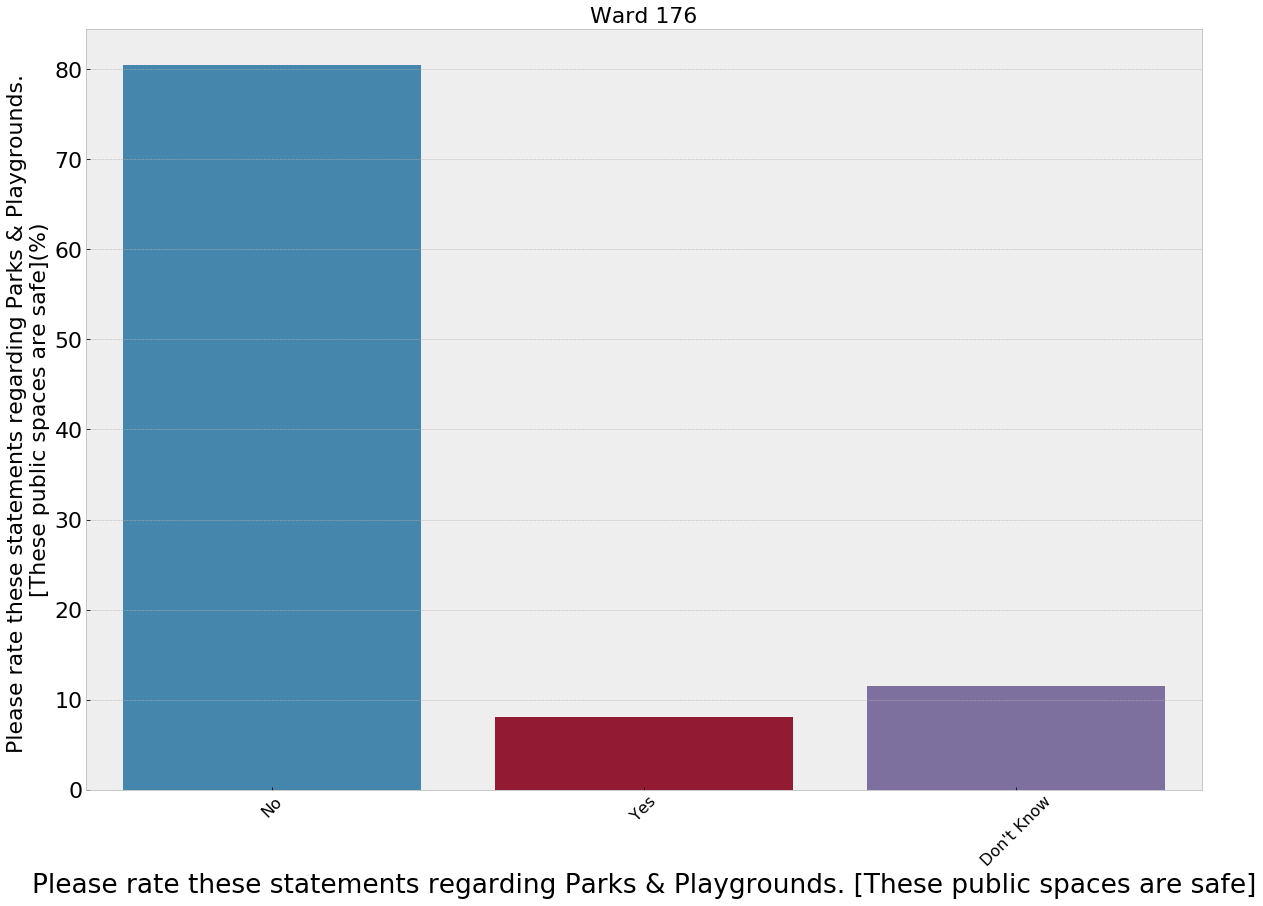

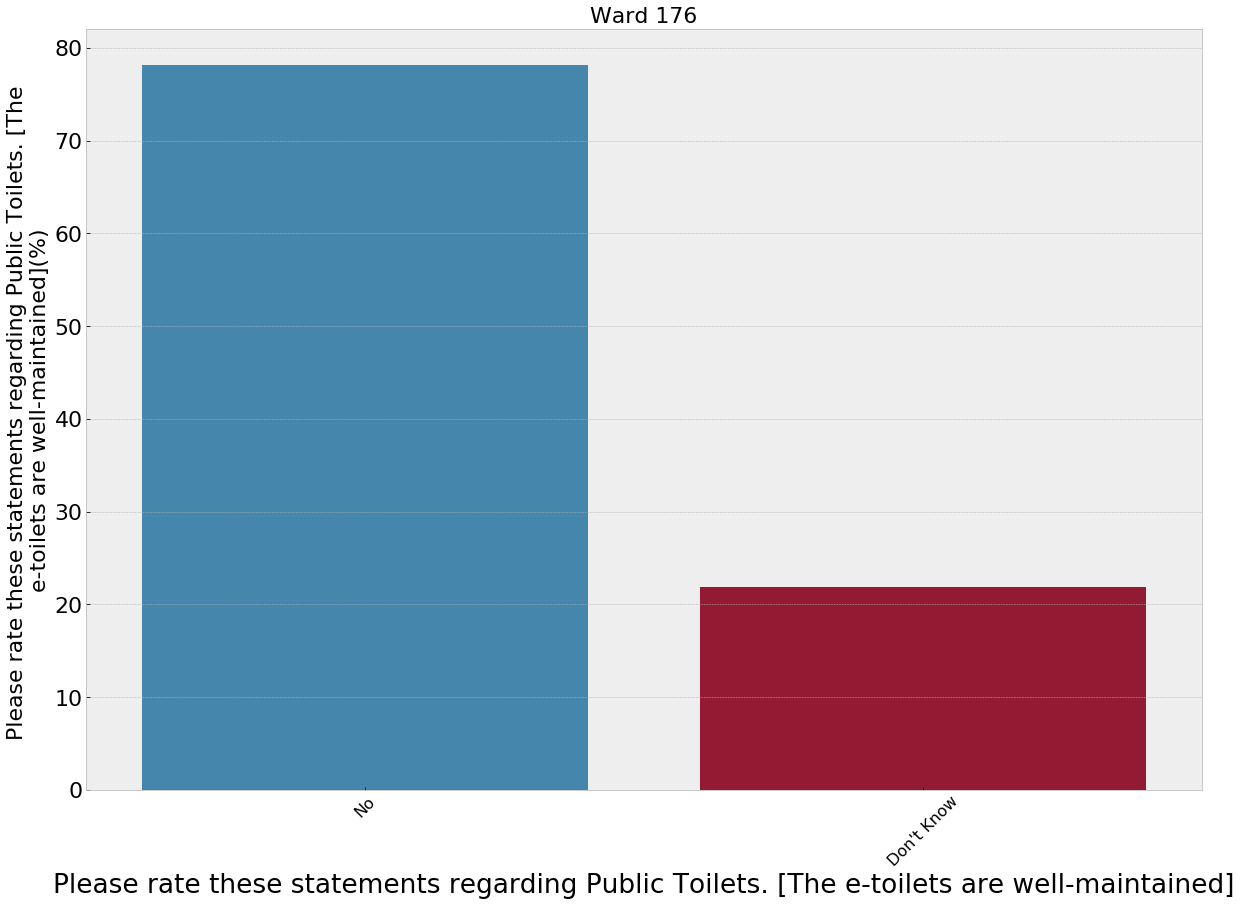

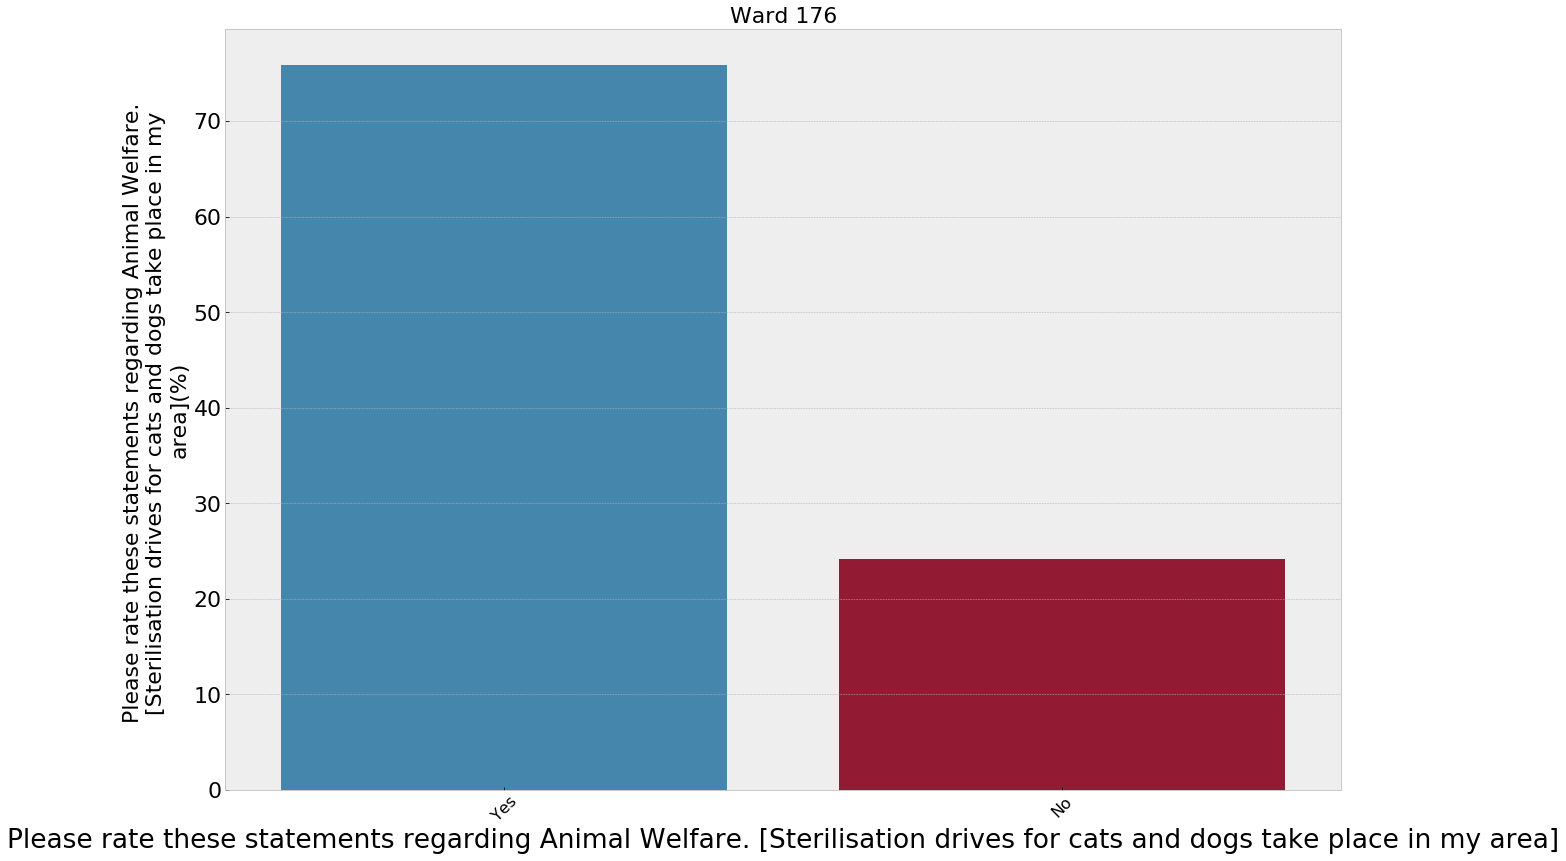

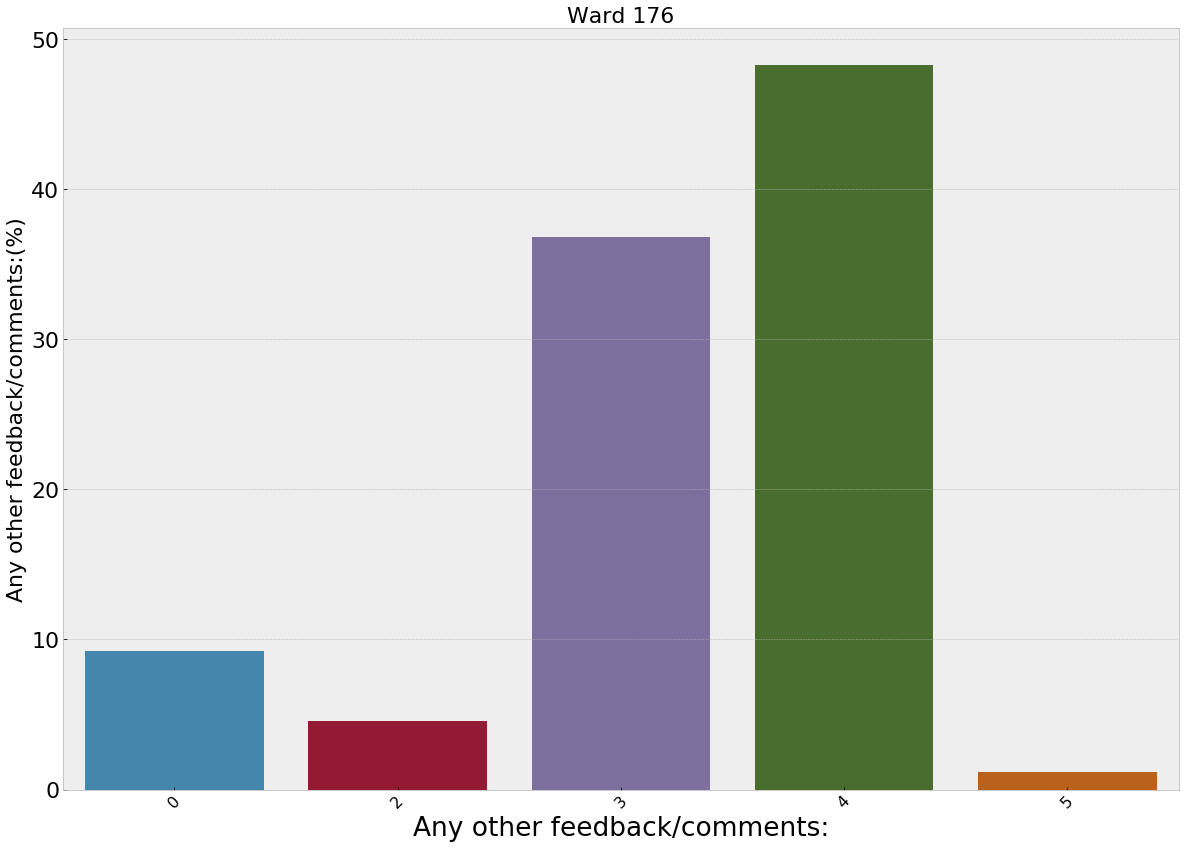

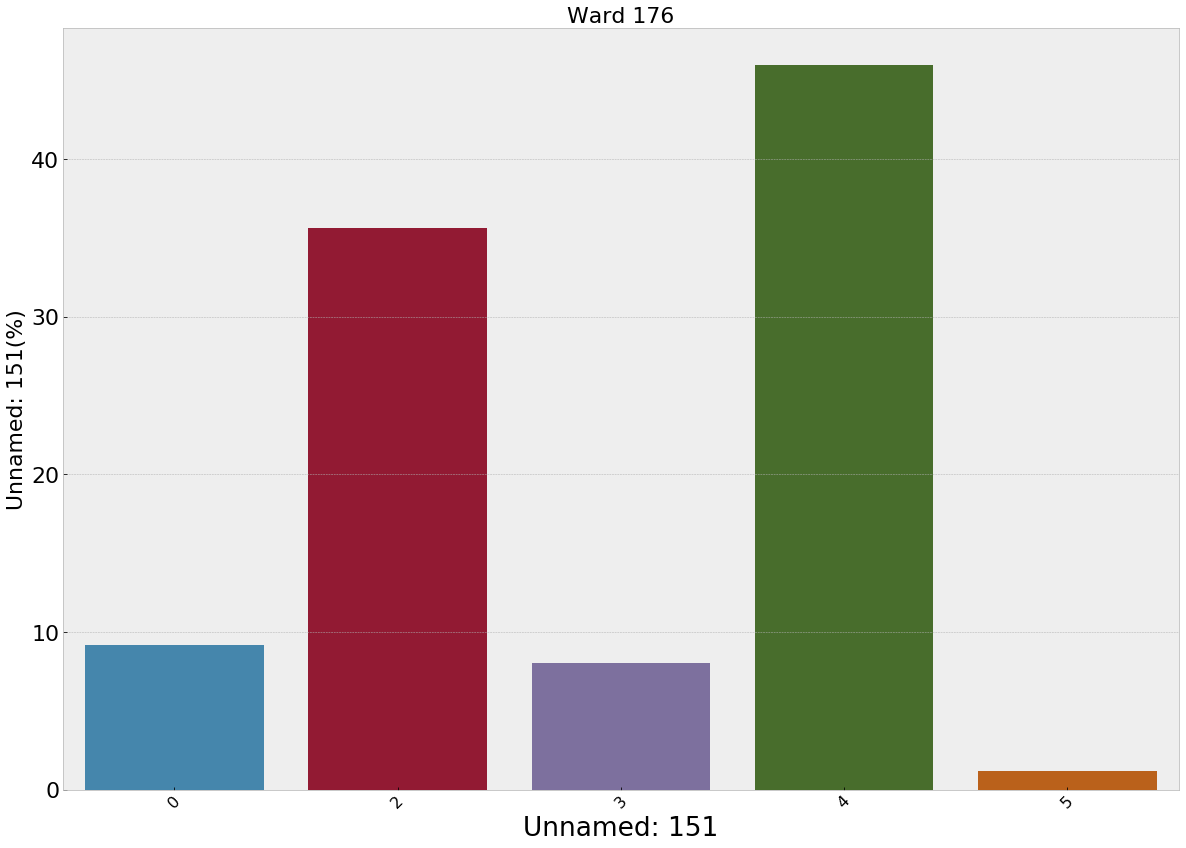

In [10]:
for colname in ward_176.columns[3:152]:
    plot_column(col=colname, data=ward_176, ward='176')